# Final Project - Methods for detecting cyber attacks - Malicious Video

### Student ID: 207276775

### GitHub project: https://github.com/RazElbaz/Final-Project-Machine-Learning-Malicious-Video



In [1]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import numpy as np
import sys
import os, time
import platform
import datetime

# Data exploration

### Explore the data, understand the featues, statistics visualize the inputs

### What is Data Exploration?

Data exploration definition: Data exploration refers to the initial step in data analysis in which data analysts use data visualization and statistical techniques to describe dataset characterizations, such as size, quantity, and accuracy, in order to better understand the nature of the data.

https://www.heavy.ai/learn/data-exploration 

### Why Is Data Exploration Important? 

Exploration allows for deeper understanding of a dataset, making it easier to navigate and use the data later. The better an analyst knows the data they're working with, the better their analysis will be.

https://www.alteryx.com/glossary/data-exploration

## Details of a file

In [2]:
import pandas as pd
files = Path("/home/raz/Desktop/final/all").glob('*')
cols =  ["video", "Last modified", "Created","mode", "ino", "dev", "nlink", "uid", "gid", "size", "atime", "mtime", "ctime"]
info = pd.DataFrame(columns=list(cols))

for file in files:
    curr=str(file).split("/")
    (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(file)
    new_rows=(curr[-1],time.ctime(os.path.getmtime(file)),time.ctime(os.path.getctime(file)),mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime)
    info.loc[len(info)] = new_rows

info   

,video,Last modified,Created,mode,ino,dev,nlink,uid,gid,size,atime,mtime,ctime
0,A1606b0e6_0 (42).mp4,Thu Aug 4 19:45:14 2022,Sat Feb 11 14:28:21 2023,33204,5506929,2053,1,1000,1000,17534522,1677234476,1659631514,1676118501
1,A1606b0e6_0 (29).mp4,Thu Aug 4 19:44:42 2022,Sat Feb 11 14:28:14 2023,33204,5506916,2053,1,1000,1000,23512815,1677234476,1659631482,1676118494
2,You Like Krabby Patties Don't You Squidward.mp4,Sat Feb 11 13:33:03 2023,Sat Feb 11 14:29:18 2023,33204,5507126,2053,1,1000,1000,688034,1677234476,1676115183,1676118558
3,B1606b0e6_1 (19).mp4,Thu Aug 4 19:46:50 2022,Sat Feb 11 14:28:46 2023,33204,5507028,2053,1,1000,1000,24950011,1677234491,1659631610,1676118526
4,B1606b0e6_1 (18).mp4,Thu Aug 4 19:46:48 2022,Sat Feb 11 14:28:45 2023,33204,5507027,2053,1,1000,1000,22276786,1677234940,1659631608,1676118525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,A1606b0e6_0 (30).mp4,Thu Aug 4 19:44:46 2022,Sat Feb 11 14:28:14 2023,33204,5506917,2053,1,1000,1000,23237736,1677237056,1659631486,1676118494
329,malware13.mp4,Sat Feb 11 13:52:46 2023,Sat Feb 11 14:28:10 2023,33204,5506871,2053,1,1000,1000,1540604,1677237056,1676116366,1676118490
330,test (29).mp4,Thu Aug 4 19:43:30 2022,Sat Feb 11 14:29:39 2023,33204,5507163,2053,1,1000,1000,20252997,1677237056,1659631410,1676118579
331,B1606b0e6_1 (41).mp4,Thu Aug 4 19:47:40 2022,Sat Feb 11 14:29:00 2023,33204,5507050,2053,1,1000,1000,25927041,1677237056,1659631660,1676118540


## Files size

In [3]:
info [["video", "size"]]

,video,size
0,A1606b0e6_0 (42).mp4,17534522
1,A1606b0e6_0 (29).mp4,23512815
2,You Like Krabby Patties Don't You Squidward.mp4,688034
3,B1606b0e6_1 (19).mp4,24950011
4,B1606b0e6_1 (18).mp4,22276786
...,...,...
328,A1606b0e6_0 (30).mp4,23237736
329,malware13.mp4,1540604
330,test (29).mp4,20252997
331,B1606b0e6_1 (41).mp4,25927041


## Creation and update times of the files

In [4]:
info [["video", "Created", "Last modified"]]

,video,Created,Last modified
0,A1606b0e6_0 (42).mp4,Sat Feb 11 14:28:21 2023,Thu Aug 4 19:45:14 2022
1,A1606b0e6_0 (29).mp4,Sat Feb 11 14:28:14 2023,Thu Aug 4 19:44:42 2022
2,You Like Krabby Patties Don't You Squidward.mp4,Sat Feb 11 14:29:18 2023,Sat Feb 11 13:33:03 2023
3,B1606b0e6_1 (19).mp4,Sat Feb 11 14:28:46 2023,Thu Aug 4 19:46:50 2022
4,B1606b0e6_1 (18).mp4,Sat Feb 11 14:28:45 2023,Thu Aug 4 19:46:48 2022
...,...,...,...
328,A1606b0e6_0 (30).mp4,Sat Feb 11 14:28:14 2023,Thu Aug 4 19:44:46 2022
329,malware13.mp4,Sat Feb 11 14:28:10 2023,Sat Feb 11 13:52:46 2023
330,test (29).mp4,Sat Feb 11 14:29:39 2023,Thu Aug 4 19:43:30 2022
331,B1606b0e6_1 (41).mp4,Sat Feb 11 14:29:00 2023,Thu Aug 4 19:47:40 2022


#### check min and max file size:

In [5]:
files = Path("/home/raz/Desktop/final/all").glob('*')
min=10000000
max=0
for file in files:
    (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(file)
    if size<min:
        min=size
    if size>max:
        max=size
        
        
print(min)
print(max)

17069
30217369


# Video Metadata 

Metadata of a video file allows users to identify the characteristics of the file, making it easier to search, use and manage the video. The video metadata can, for instance, include the date the video was created, the creator's name, location, date of upload, and camera ID.

In [6]:
#!conda install ffmpeg

In [7]:
import ffmpeg
import sys
from pprint import pprint # for printing Python dictionaries in a human-readable way
from pathlib import Path

import json

In [8]:
info.shape

(333, 13)

In [9]:
files = Path("/home/raz/Desktop/final/all").glob('*')
dict={}
i=0
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    dict[i]=ffmpeg.probe(file)["streams"]    
    i+=1

# https://www.geeksforgeeks.org/reading-and-writing-json-to-a-file-in-python/
json_object = json.dumps(dict)
 
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)


Adding metadata to the dataframe

In [10]:
i=0
values=[]
for key, value in dict.items():
    values.append(value)
info["metadata"] = values

In [11]:
info

,video,Last modified,Created,mode,ino,dev,nlink,uid,gid,size,atime,mtime,ctime,metadata
0,A1606b0e6_0 (42).mp4,Thu Aug 4 19:45:14 2022,Sat Feb 11 14:28:21 2023,33204,5506929,2053,1,1000,1000,17534522,1677234476,1659631514,1676118501,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
1,A1606b0e6_0 (29).mp4,Thu Aug 4 19:44:42 2022,Sat Feb 11 14:28:14 2023,33204,5506916,2053,1,1000,1000,23512815,1677234476,1659631482,1676118494,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
2,You Like Krabby Patties Don't You Squidward.mp4,Sat Feb 11 13:33:03 2023,Sat Feb 11 14:29:18 2023,33204,5507126,2053,1,1000,1000,688034,1677234476,1676115183,1676118558,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
3,B1606b0e6_1 (19).mp4,Thu Aug 4 19:46:50 2022,Sat Feb 11 14:28:46 2023,33204,5507028,2053,1,1000,1000,24950011,1677234491,1659631610,1676118526,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
4,B1606b0e6_1 (18).mp4,Thu Aug 4 19:46:48 2022,Sat Feb 11 14:28:45 2023,33204,5507027,2053,1,1000,1000,22276786,1677234940,1659631608,1676118525,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,A1606b0e6_0 (30).mp4,Thu Aug 4 19:44:46 2022,Sat Feb 11 14:28:14 2023,33204,5506917,2053,1,1000,1000,23237736,1677237056,1659631486,1676118494,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
329,malware13.mp4,Sat Feb 11 13:52:46 2023,Sat Feb 11 14:28:10 2023,33204,5506871,2053,1,1000,1000,1540604,1677237056,1676116366,1676118490,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
330,test (29).mp4,Thu Aug 4 19:43:30 2022,Sat Feb 11 14:29:39 2023,33204,5507163,2053,1,1000,1000,20252997,1677237056,1659631410,1676118579,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
331,B1606b0e6_1 (41).mp4,Thu Aug 4 19:47:40 2022,Sat Feb 11 14:29:00 2023,33204,5507050,2053,1,1000,1000,25927041,1677237056,1659631660,1676118540,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."


## DataFrame head and tail

pandas. head () function is used to access the first n rows of a dataframe or series. It returns a smaller version of the caller object with the first few entries.

pandas.DataFrame.tail
DataFrame.tail(n=5) -> Return the last n rows.

This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.

For negative values of n, this function returns all rows except the first |n| rows, equivalent to df[|n|:].
If n is larger than the number of rows, this function returns all rows.

### head()

In [12]:
files = Path("/home/raz/Desktop/final/all").glob('*')
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
    print("----------------------------------------------------------------------------------------")
    print(df.head())
    print("----------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  4672498   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/60             avc1  0x31637661  360.0   360.0  ...   
1      audio         1/48000             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8         52   
1                  NaN         88   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'ISO Media...        NaN         NaN   
1  {'

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/60             avc1  0x31637661  1280.0   720.0   
1      audio         1/44100             mp4a  0x6134706d     NaN     NaN   

   ...  bit_rate  bits_per_raw_sample  nb_frames  \
0  ...   1727608                    8        503   
1  ...    125598                  NaN        723   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2016-08-15T12:53:42.000000Z.

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  5232150   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  7033349   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6536241   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6227808   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6259720   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  5017672   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6934487   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  5381217   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  5331588   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type   codec_time_base codec_tag_string   codec_tag  width  height  \
0      video  1713103/99360000             avc1  0x31637661  500.0   360.0   
1      audio           1/44100             mp4a  0x6134706d    NaN     NaN   

   ...  bit_rate  bits_per_raw_sample  nb_frames  \
0  ...    200039                    8        552   
1  ...    125799                  NaN        820   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2017-03-15T18:52:10.00000

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  5623119   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  5511671   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/48             avc1  0x31637661  960.0   720.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    466370                    8        554   
1    125721                  NaN        995   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2017-10-20T17:18:24.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)      LC   
2      2        NaN                                        NaN     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/60             avc1  0x31637661  1280.0   720.0   
1      audio         1/48000             mp4a  0x6134706d     NaN     NaN   
2       data             NaN             tmcd  0x64636d74     NaN     NaN   

   ...  bits_per_raw_sample  nb_frames  \
0  ...                    8         46   
1  ...                  NaN         72   
2  ...                  NaN          1   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub':

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  3519905   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661  640.0   308.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    196242                    8        458   
1    125763                  NaN        789   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2018-11-10T23:25:32.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video     3081/185000             avc1  0x31637661  540.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    231616                    8        555   
1    125587                  NaN        797   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2014-02-13T04:41:57.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6396121   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/60             avc1  0x31637661  640.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    289508                    8        484   
1     93636                  NaN        695   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2017-10-27T06:17:23.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6608445   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  6435953   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/60             avc1  0x31637661  1280.0   720.0   
1      audio         1/44100             mp4a  0x6134706d     NaN     NaN   

   ...  bit_rate  bits_per_raw_sample  nb_frames  \
0  ...    213834                    8        210   
1  ...    128471                  NaN        302   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2022-09-01T05:23:46.000000Z.

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6569603   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  7927637   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC

----------------------------------------------------------------------------------------
   index codec_name           codec_long_name codec_type codec_time_base  \
0      0   rawvideo                 raw video      video            1/10   
1      1        mp3  MP3 (MPEG audio layer 3)      audio           1/147   

  codec_tag_string codec_tag  width  height  coded_width  ...  start_time  \
0     [0][0][0][0]    0x0000  260.0    40.0        260.0  ...    0.000000   
1       U[0][0][0]    0x0055    NaN     NaN          NaN  ...    0.000000   

   duration_ts  duration  bit_rate  nb_frames  \
0         17.0  1.700000   2652000         17   
1          NaN       NaN    128000         71   

                                         disposition sample_fmt sample_rate  \
0  {'default': 0, 'dub': 0, 'original': 0, 'comme...        NaN         NaN   
1  {'default': 0, 'dub': 0, 'original': 0, 'comme...       fltp         147   

   channels bits_per_sample  
0       NaN             NaN  
1   

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  6209699   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6796061   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video      1001/60000             avc1  0x31637661  540.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    287444                    8        497   
1    125782                  NaN        715   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2015-07-04T10:20:32.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video      1001/60000             avc1  0x31637661  640.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    106709                    8        826   
1    125727                  NaN       1187   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2018-11-02T21:32:44.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/60             avc1  0x31637661  576.0  1024.0  ...   
1      audio         1/48000             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        147   
1                  NaN        235   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt sample_rate  \
0  {'creation_time': '2022-10-03T05:57:20.000000Z...        NaN         NaN   
1  {'

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  5398161   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

### tail()

In [13]:
files = Path("/home/raz/Desktop/final/all").glob('*')
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
    print("----------------------------------------------------------------------------------------")
    print(df.tail())
    print("----------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  4672498   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661  640.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        484   
1                  NaN        621   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   
1  

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6600664   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  5658925   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/58             avc1  0x31637661  500.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    188065                    8        870   
1    125734                  NaN       1292   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2018-11-09T01:57:36.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6282675   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)  HE-AAC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/60             avc1  0x31637661  480.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        217   
1                  NaN        159   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'ISO Media...        NaN         NaN   
1  {'

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10   

                profile codec_type codec_time_base codec_tag_string  \
0  Constrained Baseline      video            1/60             avc1   

    codec_tag  width  height  ...  time_base  start_pts  start_time  \
0  0x31637661    538     360  ...    1/15360          0    0.000000   

  duration_ts  duration bit_rate  bits_per_raw_sample nb_frames  \
0         512  0.033333  5658960                    8         1   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 35 columns]
----------------------------------------------------------------------------------------
----------------------

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video      1001/60000             avc1  0x31637661  640.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bit_rate  bits_per_raw_sample  nb_frames  \
0    312526                    8        302   
1    125730                  NaN        434   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2017-10-25T04:33:36.000000Z... 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6550336   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  4905519   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)      LC   
2      2        NaN                                        NaN     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/60             avc1  0x31637661  1280.0   720.0   
1      audio         1/48000             mp4a  0x6134706d     NaN     NaN   
2       data             NaN             tmcd  0x64636d74     NaN     NaN   

   ...  bits_per_raw_sample  nb_frames  \
0  ...                    8         46   
1  ...                  NaN         72   
2  ...                  NaN          1   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub':

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6843478   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        mp3                   MP3 (MPEG audio layer 3)     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661  480.0   360.0  ...   
1      audio         1/44100             mp4a  0x6134706d    NaN     NaN  ...   

   bits_per_raw_sample  nb_frames  \
0                    8        483   
1                  NaN        619   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  sample_fmt sample_rate  \
0  {'language': 'und', 'handler_name': 'VideoHand...         NaN         NaN   
1  

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6666334   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  4863678   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/12800          0    0.000000      384000  30.000000  5865971   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags  
0  {'language': 'und', 'handler_name': 'VideoHand...  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
------------------------------------------------

   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6346845   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6504563   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type    codec_time_base codec_tag_string   codec_tag  width  height  \
0      video  2343103/135900000             avc1  0x31637661  480.0   360.0   
1      audio            1/44100             mp4a  0x6134706d    NaN     NaN   

   ...  bit_rate  bits_per_raw_sample  nb_frames  \
0  ...    128947                    8        755   
1  ...    125674                  NaN       1122   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2017-10-25T12:33:04.00

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  6254271   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  6530645   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video      1001/60000             avc1  0x31637661  1440.0  1080.0   
1      audio         1/48000             mp4a  0x6134706d     NaN     NaN   

   ...  bits_per_raw_sample  nb_frames  \
0  ...                    8         82   
1  ...                  NaN        130   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt sample_rate  \
0  {'creation_time': '2020-02-07T16:12:23.000000Z...        NaN         NaN   
1 

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  5211119   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  8054592   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  6435953   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6215114   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    Main   
1      1        aac                AAC (Advanced Audio Coding)      LC   

  codec_type  codec_time_base codec_tag_string   codec_tag  width  height  \
0      video  912161/43740000             avc1  0x31637661  540.0   360.0   
1      audio          1/44100             mp4a  0x6134706d    NaN     NaN   

   ...  bit_rate  bits_per_raw_sample  nb_frames  \
0  ...    203404                    8        243   
1  ...    126069                  NaN        437   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   

                                                tags sample_fmt  sample_rate  \
0  {'creation_time': '2016-06-17T06:10:03.000000Z.

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  7038471   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2696400  29.960000  6209699   

   bits_per_raw_sample nb_frames  \
0                    8       749   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   
1      1        aac                AAC (Advanced Audio Coding)      LC   
2      2        NaN                                        NaN     NaN   

  codec_type codec_time_base codec_tag_string   codec_tag   width  height  \
0      video            1/60             avc1  0x31637661  1280.0   720.0   
1      audio         1/48000             mp4a  0x6134706d     NaN     NaN   
2       data             NaN             tmcd  0x64636d74     NaN     NaN   

   ...  bits_per_raw_sample  nb_frames  \
0  ...                    8         46   
1  ...                  NaN         72   
2  ...                  NaN          1   

                                         disposition  \
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
1  {'default': 1, 'dub': 0, 'original': 0, 'comme...   
2  {'default': 0, 'dub': 0, 'original': 0, 'comme...   



----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6772143   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6511020   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  5410350   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

----------------------------------------------------------------------------------------
   index codec_name                            codec_long_name profile  \
0      0       h264  H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10    High   

  codec_type codec_time_base codec_tag_string   codec_tag  width  height  ...  \
0      video            1/50             avc1  0x31637661   1920    1080  ...   

   time_base  start_pts  start_time duration_ts   duration bit_rate  \
0    1/90000          0    0.000000     2700000  30.000000  6788195   

   bits_per_raw_sample nb_frames  \
0                    8       750   

                                         disposition                 tags  
0  {'default': 1, 'dub': 0, 'original': 0, 'comme...  {'language': 'eng'}  

[1 rows x 31 columns]
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
   index codec_name           

### As you can see, we discovered in the tail that not all files contain only audio or video, some also contain other types of files, such as data, which should make us suspect that this is a malicious video.

## Data type
pandas.DataFrame.dtypes
property DataFrame.dtypes[source]
Return the dtypes in the DataFrame.

In [14]:
files = Path("/home/raz/Desktop/final/all").glob('*')
#https://www.thepythoncode.com/article/extract-media-metadata-in-python   
for file in files:
    df = pd.DataFrame(ffmpeg.probe(file)["streams"]) 
print(df.dtypes)

index                   int64
codec_name             object
codec_long_name        object
profile                object
codec_type             object
codec_time_base        object
codec_tag_string       object
codec_tag              object
width                   int64
height                  int64
coded_width             int64
coded_height            int64
has_b_frames            int64
pix_fmt                object
level                   int64
chroma_location        object
refs                    int64
is_avc                 object
nal_length_size        object
r_frame_rate           object
avg_frame_rate         object
time_base              object
start_pts               int64
start_time             object
duration_ts             int64
duration               object
bit_rate               object
bits_per_raw_sample    object
nb_frames              object
disposition            object
tags                   object
dtype: object


### Adding the metadata as columns in the DataFrame 

In [15]:
lst1=[]
lst=[]
for key,value in dict.items():
    for i in value:
        for k,v in list(i.items()):
            lst.append(k)

output = []
for x in lst:
    if x not in output:
        output.append(x)
print(output)

['index', 'codec_name', 'codec_long_name', 'profile', 'codec_type', 'codec_time_base', 'codec_tag_string', 'codec_tag', 'width', 'height', 'coded_width', 'coded_height', 'has_b_frames', 'pix_fmt', 'level', 'chroma_location', 'refs', 'is_avc', 'nal_length_size', 'r_frame_rate', 'avg_frame_rate', 'time_base', 'start_pts', 'start_time', 'duration_ts', 'duration', 'bit_rate', 'bits_per_raw_sample', 'nb_frames', 'disposition', 'tags', 'sample_aspect_ratio', 'display_aspect_ratio', 'sample_fmt', 'sample_rate', 'channels', 'channel_layout', 'bits_per_sample', 'max_bit_rate', 'color_range', 'color_space', 'color_transfer', 'color_primaries', 'quarter_sample', 'divx_packed']


In [16]:
# Import DictWriter class from CSV module
from csv import DictWriter
files = Path("/home/raz/Desktop/final/all").glob('*')
dict={}
i=0
for file in files:
    dict[i]=(ffmpeg.probe(file)["streams"])
    i+=1
    
columns=output
curr = pd.DataFrame(columns=columns)

j=0
for key,value in dict.items():
        curr.loc[len(curr)]=value[0]
#         print(value[0])
        j=j+1
print(j)

333


In [17]:
curr

,index,codec_name,codec_long_name,profile,codec_type,codec_time_base,codec_tag_string,codec_tag,width,height,...,channels,channel_layout,bits_per_sample,max_bit_rate,color_range,color_space,color_transfer,color_primaries,quarter_sample,divx_packed
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,Main,video,1001/60000,avc1,0x31637661,640.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,480.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
curr

,index,codec_name,codec_long_name,profile,codec_type,codec_time_base,codec_tag_string,codec_tag,width,height,...,channels,channel_layout,bits_per_sample,max_bit_rate,color_range,color_space,color_transfer,color_primaries,quarter_sample,divx_packed
0,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,Main,video,1001/60000,avc1,0x31637661,640.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,480.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,0,h264,H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10,High,video,1/50,avc1,0x31637661,1920.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
info

,video,Last modified,Created,mode,ino,dev,nlink,uid,gid,size,atime,mtime,ctime,metadata
0,A1606b0e6_0 (42).mp4,Thu Aug 4 19:45:14 2022,Sat Feb 11 14:28:21 2023,33204,5506929,2053,1,1000,1000,17534522,1677234476,1659631514,1676118501,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
1,A1606b0e6_0 (29).mp4,Thu Aug 4 19:44:42 2022,Sat Feb 11 14:28:14 2023,33204,5506916,2053,1,1000,1000,23512815,1677234476,1659631482,1676118494,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
2,You Like Krabby Patties Don't You Squidward.mp4,Sat Feb 11 13:33:03 2023,Sat Feb 11 14:29:18 2023,33204,5507126,2053,1,1000,1000,688034,1677234476,1676115183,1676118558,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
3,B1606b0e6_1 (19).mp4,Thu Aug 4 19:46:50 2022,Sat Feb 11 14:28:46 2023,33204,5507028,2053,1,1000,1000,24950011,1677234491,1659631610,1676118526,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
4,B1606b0e6_1 (18).mp4,Thu Aug 4 19:46:48 2022,Sat Feb 11 14:28:45 2023,33204,5507027,2053,1,1000,1000,22276786,1677234940,1659631608,1676118525,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,A1606b0e6_0 (30).mp4,Thu Aug 4 19:44:46 2022,Sat Feb 11 14:28:14 2023,33204,5506917,2053,1,1000,1000,23237736,1677237056,1659631486,1676118494,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
329,malware13.mp4,Sat Feb 11 13:52:46 2023,Sat Feb 11 14:28:10 2023,33204,5506871,2053,1,1000,1000,1540604,1677237056,1676116366,1676118490,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
330,test (29).mp4,Thu Aug 4 19:43:30 2022,Sat Feb 11 14:29:39 2023,33204,5507163,2053,1,1000,1000,20252997,1677237056,1659631410,1676118579,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."
331,B1606b0e6_1 (41).mp4,Thu Aug 4 19:47:40 2022,Sat Feb 11 14:29:00 2023,33204,5507050,2053,1,1000,1000,25927041,1677237056,1659631660,1676118540,"[{'index': 0, 'codec_name': 'h264', 'codec_lon..."


## Connection of all the information columns of the dataset

In [20]:
tmp = pd.concat([info, curr.reindex(info.index)], axis=1)

In [21]:
tmp

,video,Last modified,Created,mode,ino,dev,nlink,uid,gid,size,...,channels,channel_layout,bits_per_sample,max_bit_rate,color_range,color_space,color_transfer,color_primaries,quarter_sample,divx_packed
0,A1606b0e6_0 (42).mp4,Thu Aug 4 19:45:14 2022,Sat Feb 11 14:28:21 2023,33204,5506929,2053,1,1000,1000,17534522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1606b0e6_0 (29).mp4,Thu Aug 4 19:44:42 2022,Sat Feb 11 14:28:14 2023,33204,5506916,2053,1,1000,1000,23512815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,You Like Krabby Patties Don't You Squidward.mp4,Sat Feb 11 13:33:03 2023,Sat Feb 11 14:29:18 2023,33204,5507126,2053,1,1000,1000,688034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B1606b0e6_1 (19).mp4,Thu Aug 4 19:46:50 2022,Sat Feb 11 14:28:46 2023,33204,5507028,2053,1,1000,1000,24950011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B1606b0e6_1 (18).mp4,Thu Aug 4 19:46:48 2022,Sat Feb 11 14:28:45 2023,33204,5507027,2053,1,1000,1000,22276786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,A1606b0e6_0 (30).mp4,Thu Aug 4 19:44:46 2022,Sat Feb 11 14:28:14 2023,33204,5506917,2053,1,1000,1000,23237736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,malware13.mp4,Sat Feb 11 13:52:46 2023,Sat Feb 11 14:28:10 2023,33204,5506871,2053,1,1000,1000,1540604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,test (29).mp4,Thu Aug 4 19:43:30 2022,Sat Feb 11 14:29:39 2023,33204,5507163,2053,1,1000,1000,20252997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,B1606b0e6_1 (41).mp4,Thu Aug 4 19:47:40 2022,Sat Feb 11 14:29:00 2023,33204,5507050,2053,1,1000,1000,25927041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
from csv import DictWriter
files = Path("/home/raz/Desktop/final/all").glob('*')
real = pd.DataFrame()
lst=[]
for file in files:
    curr=str(file).split("/")
    if curr[-1][0].isdigit() or curr[-1].startswith("malware"):
        lst.append('malware') 
    else:
        lst.append('benign')
real["mal"]=lst

In [23]:
print(real["mal"])

0       benign
1       benign
2       benign
3       benign
4       benign
        ...   
328     benign
329    malware
330     benign
331     benign
332     benign
Name: mal, Length: 333, dtype: object


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
tmp

,video,Last modified,Created,mode,ino,dev,nlink,uid,gid,size,...,channels,channel_layout,bits_per_sample,max_bit_rate,color_range,color_space,color_transfer,color_primaries,quarter_sample,divx_packed
0,A1606b0e6_0 (42).mp4,Thu Aug 4 19:45:14 2022,Sat Feb 11 14:28:21 2023,33204,5506929,2053,1,1000,1000,17534522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1606b0e6_0 (29).mp4,Thu Aug 4 19:44:42 2022,Sat Feb 11 14:28:14 2023,33204,5506916,2053,1,1000,1000,23512815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,You Like Krabby Patties Don't You Squidward.mp4,Sat Feb 11 13:33:03 2023,Sat Feb 11 14:29:18 2023,33204,5507126,2053,1,1000,1000,688034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B1606b0e6_1 (19).mp4,Thu Aug 4 19:46:50 2022,Sat Feb 11 14:28:46 2023,33204,5507028,2053,1,1000,1000,24950011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B1606b0e6_1 (18).mp4,Thu Aug 4 19:46:48 2022,Sat Feb 11 14:28:45 2023,33204,5507027,2053,1,1000,1000,22276786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,A1606b0e6_0 (30).mp4,Thu Aug 4 19:44:46 2022,Sat Feb 11 14:28:14 2023,33204,5506917,2053,1,1000,1000,23237736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,malware13.mp4,Sat Feb 11 13:52:46 2023,Sat Feb 11 14:28:10 2023,33204,5506871,2053,1,1000,1000,1540604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,test (29).mp4,Thu Aug 4 19:43:30 2022,Sat Feb 11 14:29:39 2023,33204,5507163,2053,1,1000,1000,20252997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,B1606b0e6_1 (41).mp4,Thu Aug 4 19:47:40 2022,Sat Feb 11 14:29:00 2023,33204,5507050,2053,1,1000,1000,25927041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
tmp.shape

(333, 59)

skew:
    
    In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.


/tmp/ipykernel_19648/2024470048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp['has_b_frames'])


Skewness: -1.834757
Kurtosis: 2.895572


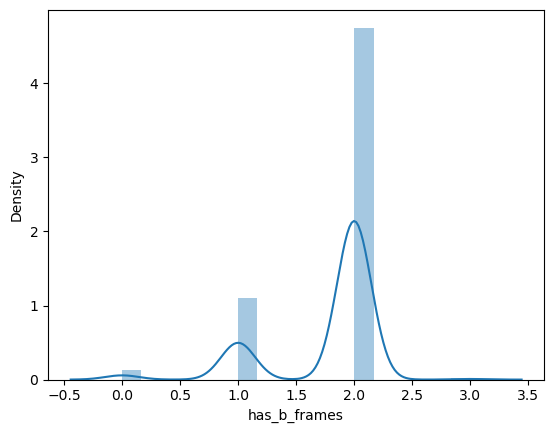

In [26]:
sns.distplot(tmp['has_b_frames'])
print("Skewness: %f" % tmp['has_b_frames'].skew())
print("Kurtosis: %f" % tmp['has_b_frames'].kurt())

/tmp/ipykernel_19648/943007388.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp['width'])


Skewness: -0.445147
Kurtosis: -1.657921


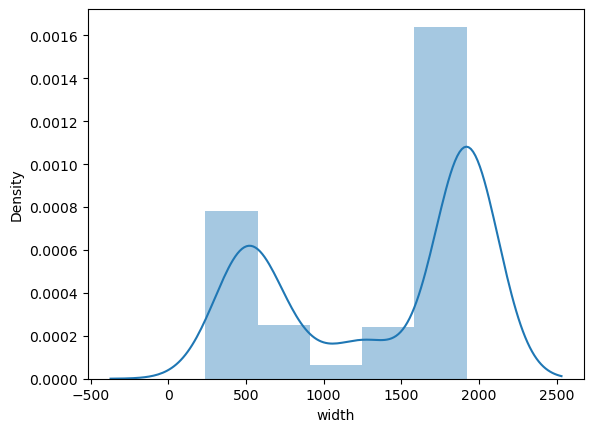

In [27]:
sns.distplot(tmp['width'])
print("Skewness: %f" % tmp['width'].skew())
print("Kurtosis: %f" % tmp['width'].kurt())

/tmp/ipykernel_19648/1676633128.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp['height'])


Skewness: -0.490943
Kurtosis: -1.565064


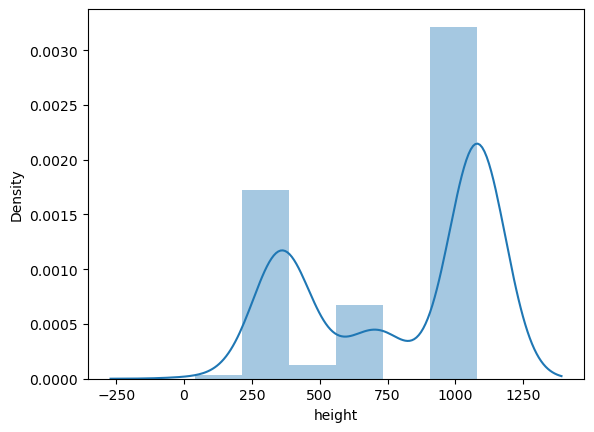

In [28]:
sns.distplot(tmp['height'])
print("Skewness: %f" % tmp['height'].skew())
print("Kurtosis: %f" % tmp['height'].kurt())

## Memory Heat Map (MHM)
According to the article:
http://www.cs.yale.edu/homes/yoon-man-ki/DAC2015_MemoryHeatMap.pdf ,
The efficiency can be seen in the Memory Heat Map (MHM) to characterize the memory behavior of the operating system and to identify an anomaly in a real-time system.

/tmp/ipykernel_19648/2686750180.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(tmp.corr(), vmin=-1, vmax=1, annot=True)


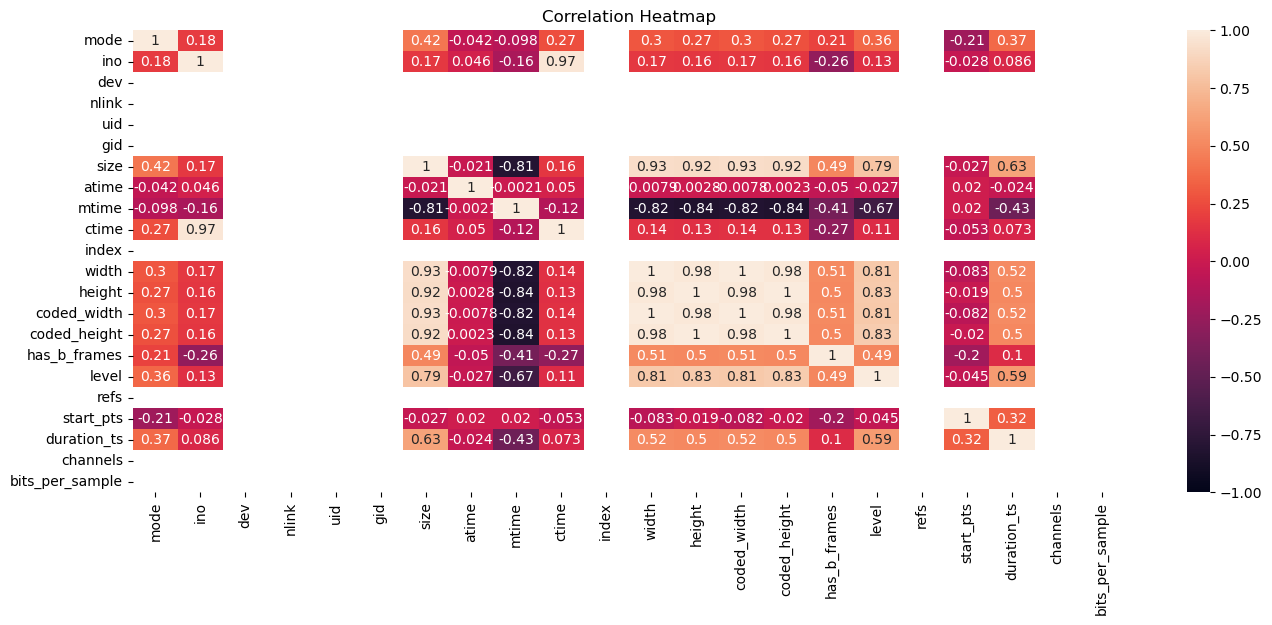

In [29]:
import matplotlib.pyplot as plt
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(tmp.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

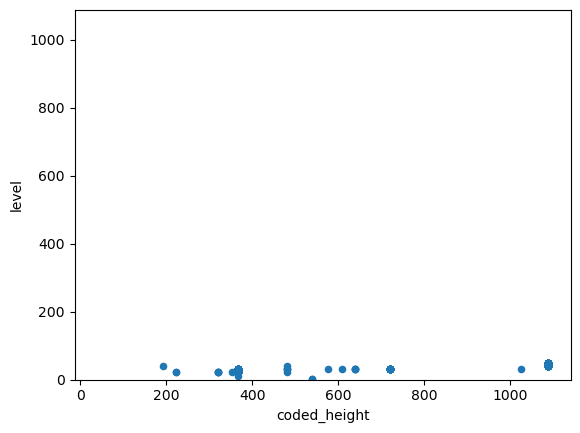

In [30]:
#scatter plot totalbsmtsf/saleprice
var = 'coded_height'
data = pd.concat([tmp['level'], tmp[var]], axis=1)
data.plot.scatter(x=var, y='level', ylim=(0,1088));

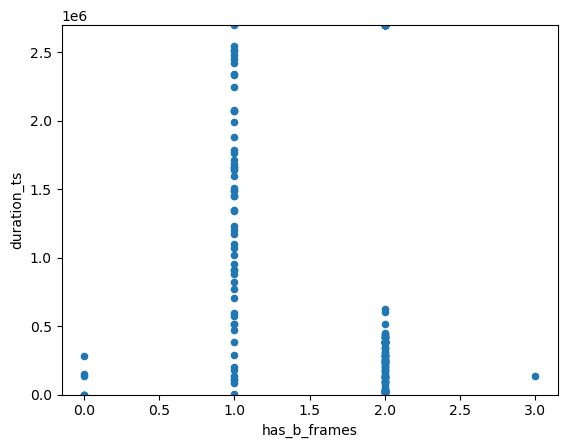

In [31]:
import importlib
#scatter plot totalbsmtsf/saleprice
var = 'has_b_frames'
data = pd.concat([tmp['duration_ts'], tmp[var]], axis=1)
data.plot.scatter(x=var, y='duration_ts', ylim=(0,2700000));

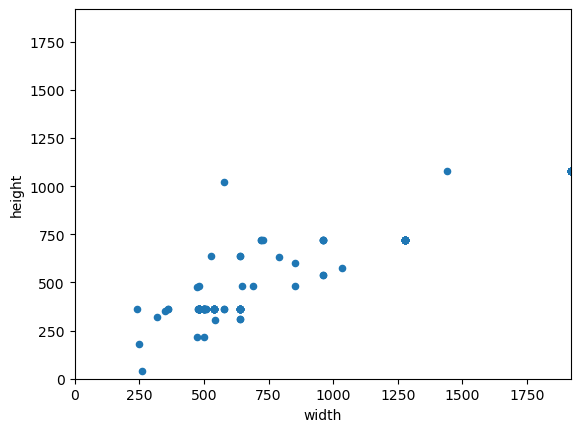

In [32]:
#scatter plot totalbsmtsf/saleprice
var = 'width'
data = pd.concat([tmp['height'], tmp[var]], axis=1)
data.plot.scatter(x=var, y='height' ,ylim=(0,1920),xlim=(0,1920));

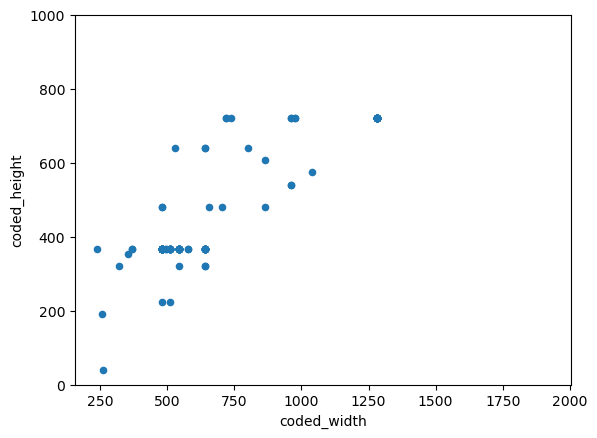

In [33]:
#scatter plot totalbsmtsf/saleprice
var = 'coded_width'        
data = pd.concat([tmp['coded_height'], tmp[var]], axis=1)
data.plot.scatter(x=var, y='coded_height', ylim=(0,1000));

# Data organization

our columns:

['index', 'codec_name', 'codec_long_name', 'profile', 'codec_type',
'codec_time_base', 'codec_tag_string', 'codec_tag', 'width', 'height',
'coded_width', 'coded_height', 'has_b_frames', 'pix_fmt', 'level', 'chroma_location', 
'refs', 'is_avc', 'nal_length_size', 'r_frame_rate', 'avg_frame_rate', 'time_base', 'start_pts',
'start_time', 'duration_ts', 'duration', 'bit_rate', 'bits_per_raw_sample', 'nb_frames', 
'channels',  'bits_per_sample', 'max_bit_rate', 'color_range', 'color_space', 
'color_transfer', 'color_primaries', 'quarter_sample', 'divx_packed''disposition', 'tags', 
'sample_aspect_ratio', 'display_aspect_ratio', 'sample_fmt', 'sample_rate', 'channel_layout']


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### 'codec_name'

At a fundamental level, you can specify the type of a media file using a simple MIME type, such as video/mp4 or audio/mpeg. However, many media types—especially those that support video tracks—can benefit from the ability to more precisely describe the format of the data within them. For instance, just describing a video in an MPEG-4 file with the MIME type video/mp4 doesn't say anything about what format the actual media within takes.

For that reason, the codecs parameter can be added to the MIME type describing media content. With it, container-specific information can be provided. This information may include things like the profile of the video codec, the type used for the audio tracks, and so forth.

In [35]:
print(tmp['codec_name'].unique())

['h264' 'mpeg4' 'rawvideo' 'aac']


In [36]:
tmp['tag_codec_name'] = le.fit_transform(tmp['codec_name'])

In [37]:
# print(tmp['tag_codec_name'])

### 'codec_long_name'

While most codecs are known by some abbreviation of the name, the Codec Long Name gives the full name of the codec in question. For example:

advanced audio coding (AAC)
pcm signed 16-bit little-endian
motion JPEG
and others.
If the Codec Long Name is present in a file, it automatically means that the file is encoded.

In [38]:
print(tmp['codec_long_name'].unique()) #this is same to 'codec_name' so we won't tag it

['H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10' 'MPEG-4 part 2' 'raw video'
 'AAC (Advanced Audio Coding)']


### 'profile'

The profile defines the subset of bit stream features in an H.264 stream, including color reproduction and additional video compression. It is. important that the selected profile is compatible with the recording device so that a stream can be decoded and viewed.

In [39]:
print(tmp['profile'].unique())

['High' 'Main' 'Constrained Baseline' 'Simple Profile' nan 'LC']


In [40]:
tmp['tag_profile'] = le.fit_transform(tmp['profile'])

In [41]:
print(tmp['tag_profile'])

0      1
1      1
2      3
3      1
4      1
      ..
328    1
329    1
330    1
331    1
332    1
Name: tag_profile, Length: 333, dtype: int64


### 'codec_type'

codec_type indicates the decoded stream type

In [42]:
print(tmp['codec_type'].unique())

['video' 'audio']


In [43]:
def categorize(row): 
    if  row['codec_type'] == 'data' :
        return 1
    else:
        return 0

tmp["tag_codec_type"] = tmp.apply(lambda row: categorize(row), axis=1)

In [44]:
print(tmp['tag_codec_type'])

0      0
1      0
2      0
3      0
4      0
      ..
328    0
329    0
330    0
331    0
332    0
Name: tag_codec_type, Length: 333, dtype: int64


### 'codec_time_base'

In [45]:
print(tmp['codec_time_base'].unique())

['1/50' '1001/60000' '1/60' '2069999/120060000' '3/173' '125089/6635520'
 '1/58' '500/16757' '3/100' '1/48' '125/7118' '1/20' '1713103/99360000'
 '1349999/78300000' '19853/1190000' '17753/888000' '269/17880'
 '27817/2949120' '50/2997' '2343103/135900000' '5539/332500' '3081/185000'
 '134651/2734080' '625/18694' '8081/312320' '18925/908842'
 '912161/43740000' '1/10' '1/48000' '139259/4177920' '500/29901'
 '2519999/146160000' '1147/132720' '175507/7875000' '3013931/181440000']


In [46]:
tmp['tag_codec_time_base'] = le.fit_transform(tmp['codec_time_base'])

In [47]:
print(tmp['tag_codec_time_base'])

0      4
1      4
2      7
3      4
4      4
      ..
328    4
329    4
330    4
331    4
332    4
Name: tag_codec_time_base, Length: 333, dtype: int64


### 'codec_tag_string'
The Codec Tag is another way to represent the codec used to encode a media file such as a video or music file. Usually, there is more information available for the codec used in a media file. One of them is the Codec Tag. The value for the Codec Tag usually consists of a string of numbers.

In [48]:
print(tmp['codec_tag_string'].unique())

['avc1' 'xvid' '[0][0][0][0]' 'mp4a']


In [49]:
tmp['tag_codec_tag_string'] = le.fit_transform(tmp['codec_tag_string'])

In [50]:
print(tmp['tag_codec_tag_string'])

0      1
1      1
2      1
3      1
4      1
      ..
328    1
329    1
330    1
331    1
332    1
Name: tag_codec_tag_string, Length: 333, dtype: int64


### 'codec_tag'
The Codec Tag is another way to represent the codec used to encode a media file such as a video or music file. Usually, there is more information available for the codec used in a media file. One of them is the Codec Tag. The value for the Codec Tag usually consists of a string of numbers.

In [51]:
print(tmp['codec_tag'].unique()) #this is same to 'codec_tag_string' so we won't tag it

['0x31637661' '0x64697678' '0x0000' '0x6134706d']


### 'width' & 'height'

The width and height of videos are usually measured in pixels and are collectively termed as the "dimensions" of the video. Thus, if a video is 320 pixels wide and 240 pixels in height, it is said to have dimensions of 320 x 240 pixels.

In [52]:
print(tmp['width'].unique())

[1920.  640.  480. 1280.  360.  500.  540.  508.  240.  790.  538.  648.
  478.  544.  960. 1036.  728.  962.  720. 1440.  474.  854.  320.  350.
  260.   nan  482.  690.  248.  528.  576.]


In [53]:
print(tmp['height'].unique())

[1080.  360.  720.  218.  630.  480.  306.  576.  308.  640.  540.  602.
  320.  350.   40.   nan  474.  178. 1024.]


### 'coded_width' & 'coded_height'

The Coded Width that can be found in many files, is a subset of the general width of a file. Similar to the other subsets like the image width or cropped image width, the Coded Width specifies a specific width within the file.

In case of the Coded Width, it expressed the width of a video file, picture or photo, document or even parts of an audio file (e.g. the cover art) as it is coded within the file. This can and usually does differ from the original width of the file and is altered to fit within a certain standard or requirement.

Together, the Coded Width and the Coded Height form the coded dimension of the file.

In [54]:
print(tmp['coded_width'].unique())

[1920.  640.  480. 1280.  368.  512.  544.  240.  800.  656.  960. 1040.
  736.  976.  720. 1440.  864.  320.  352.  260.   nan  496.  704.  256.
  528.  576.]


In [55]:
print(tmp['coded_height'].unique())

[1088.  368.  720.  224.  640.  480.  320.  576.  540.  608.  352.   40.
   nan  192. 1024.]


### 'has_b_frames'

In many video files, a meta information called Has B Frames can be found. This has to do with the video compression and compression of the frames of a video. Different frame types can be used as the algorithm for this compression.

In [56]:
print(tmp['has_b_frames'].unique())

[ 2.  1.  0.  3. nan]


### 'pix_fmt'

pix_fmts shows all supported pixel formats

In [57]:
print(tmp['pix_fmt'].unique())

['yuv420p' 'yuvj420p' 'bgr24' nan]


### 'level'

For broadcast encoding, it is defined in 8-bit color depth (values between 0 and 255) where black is level 16, and white is level 235. These are often referred to as “video levels”.

In [58]:
print(tmp['level'].unique())

[ 50.  30.  21.  40.  31.  22.  12.  32.  42.   3. -99.  nan  41.]


In [59]:
tmp['tag_level'] = le.fit_transform(tmp['level'])

In [60]:
print(tmp['tag_level'])

0      11
1      11
2       5
3      11
4      11
       ..
328    11
329     3
330     8
331    11
332    11
Name: tag_level, Length: 333, dtype: int64


### 'chroma_location'

chroma locations

  chromaloc	||| ffmpeg chroma_location
  
        0	left
        
        1	center
        
        2	topleft
        
        3	top
        
        4	bottomleft
        
        5	bottom

In [61]:
print(tmp['chroma_location'].unique())

['left' nan]


### 'refs'

In [62]:
print(tmp['refs'].unique())

[ 1. nan]


### 'is_avc'

Used to parse AVC variant of h264.

this flag is != 0 if codec is avc1

In [63]:
print(tmp['is_avc'].unique())

['true' nan]


### 'nal_length_size'

Number of bytes used for nal length (1, 2 or 4)

In [64]:
print(tmp['nal_length_size'].unique())

['4' nan]


In [65]:
tmp['tag_nal_length_size'] = le.fit_transform(tmp['nal_length_size'])

### 'r_frame_rate'

Specifies the number of frames to be displayed every second. For example, the function call frameRate(30) will attempt to refresh 30 times a second.

In [66]:
print(tmp['r_frame_rate'].unique())

['25/1' '30000/1001' '30/1' '29/1' '173/6' '16757/1000' '50/3' '24/1'
 '3559/125' '10/1' '60/1' '60000/1001' '2997/100' '18694/625' '1199/50'
 '24000/1001' '0/0' '15/1' '29901/1000' '59/1' '269/12']


In [67]:
tmp['tag_r_frame_rate'] = le.fit_transform(tmp['r_frame_rate'])

In [68]:
print(tmp['tag_r_frame_rate'])

0       9
1       9
2      15
3       9
4       9
       ..
328     9
329     9
330     9
331     9
332     9
Name: tag_r_frame_rate, Length: 333, dtype: int64


### 'time_base'

time_base. This is the fundamental unit of time (in seconds) in terms of which frame timestamps are represented.

In [69]:
print(tmp['time_base'].unique())

['1/90000' '1/12800' '1/15360' '1/11072' '1/16757' '1/14236' '1/30000'
 '1/12288' '1/19200' '1/11988' '625/18694' '1/600' '1/19184' '1/10240'
 '1/10' '1/48000' '1/29901']


### 'start_pts' & 'start_time'

https://ffmpeg.org/ffmpeg-filters.html
#### pts
The PTS (Presentation TimeStamp) of the output audio frame, expressed in TB units.

#### start_time, st
Specify the timestamp (in seconds) of the frame to start to apply the fade effect. If both start_frame and start_time are specified, the fade will start at whichever comes last. Default is 0.

In [70]:
print(tmp['start_pts'].unique())

[   0  707 3690 3407]


In [71]:
tmp['tag_start_pts'] = le.fit_transform(tmp['start_pts'])

In [72]:
print(tmp['tag_start_pts'])

0      0
1      0
2      0
3      0
4      0
      ..
328    0
329    0
330    0
331    0
332    0
Name: tag_start_pts, Length: 333, dtype: int64


In [73]:
print(tmp['start_time'].unique())

['0.000000' '0.046029' '0.041000' '0.113567']


In [74]:
def categorize(row): 
    if  row['start_time'] == '0.000000' :
        return 0
    else:
        return 1

tmp["tag_start_time"] = tmp.apply(lambda row: categorize(row), axis=1)

In [75]:
print(tmp['tag_start_time'])

0      0
1      0
2      0
3      0
4      0
      ..
328    0
329    0
330    0
331    0
332    0
Name: tag_start_time, Length: 333, dtype: int64


### 'avg_frame_rate'

## Reading Videos using OpenCV-Frame rate
Frame rate is the measurement of how quickly a number of frames appears within a second, which is why it's also called FPS (frames per second).

In [76]:
!pip install opencv-python

In [77]:
import cv2

we want to check for the avg_frame_rate parameter of the desired video stream. If the value of this parameter is a fraction like this

"avg_frame_rate": "1205285219/50270287"
with a denominator that is not 1 then the video file *has* a variable frame rate.

If the value is like this

"avg_frame_rate": "25/1" 
with a denominator that is 1 then the video file  *has no* a variable frame rate.

we need to check if the stream has a constant frame rate.

https://superuser.com/questions/1487401/how-can-i-tell-if-a-video-has-a-variable-frame-rate

In [78]:
files = Path("/home/raz/Desktop/final/all").glob('*')
for file in files:
    head, tail =os.path.split(file)
    print("----------------------------------------------------------------------------------------")
    print(tail)
    info=ffmpeg.probe(file)
    print(f"duration={info['format']['duration']}")
    print(f"framerate={info['streams'][0]['avg_frame_rate']}")
    

----------------------------------------------------------------------------------------
A1606b0e6_0 (42).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (29).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
You Like Krabby Patties Don't You Squidward.mp4
duration=18.692056
framerate=30000/1001
----------------------------------------------------------------------------------------
B1606b0e6_1 (19).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (18).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (54).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
malware30.mp4


duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (60).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (6).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
test (16).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (11).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
22.mp4
duration=0.034000
framerate=30/1
----------------------------------------------------------------------------------------
Im ready im ready!.mp4
duration=10.588289
framerate=24/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (60).mp4
duration=30.0

duration=19.320000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (40).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
Patrick Drops Watermelon on Squidward!!.mp4
duration=28.328344
framerate=30000/1001
----------------------------------------------------------------------------------------
A1606b0e6_0 (69).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
malware43.mp4
duration=10.240000
framerate=25/1
----------------------------------------------------------------------------------------
What's His Name, What's His Name, We Threw Out His Name!.mp4
duration=15.000089
framerate=39150000/1349999
----------------------------------------------------------------------------------------
test (30).mp4
duration=30.000000
framerate=25/1
-----------------------------------

duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
test (27).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (27).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
9.mp4
duration=1.533333
framerate=30/1
----------------------------------------------------------------------------------------
Too bad that didn`t kill me.mp4
duration=22.175056
framerate=166250/5539
----------------------------------------------------------------------------------------
malware52.mp4
duration=30.067000
framerate=25/1
----------------------------------------------------------------------------------------
The Most Epic High Speed Chase.mp4
duration=16.555822
framerate=30/1
----------------------------------------------------------------------------------------
THE TRUTH W

duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
I Hate The Pill.mp4
duration=11.888611
framerate=30/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (15).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
27.mp4
duration=7.012370
framerate=30/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (64).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
A1606b0e6_0 (16).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (21).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
21.mp4
duration=157.734000
fr

duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
test (4).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (28).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (1).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
B1606b0e6_1 (70).mp4
duration=30.000000
framerate=25/1
----------------------------------------------------------------------------------------
4.mp4
duration=9.558345
framerate=66360/1147
----------------------------------------------------------------------------------------
This is a load of barnacles....mp4
duration=7.801900
framerate=3937500/175507
----------------------------------------------------------------------------------------
The Lid.m

In [79]:
def categorize(row): 
    rate=str(row['avg_frame_rate'])
    rate=rate.split('/')
    if  rate[-1] == "1" :
        return 0
    else:
        return 1

tmp["tag_frame_rate"] = tmp.apply(lambda row: categorize(row), axis=1)

In [80]:
print(tmp["tag_frame_rate"].unique())

[0 1]


### 'duration'

duration, d
The number of seconds for which the fade effect has to last. At the end of the fade-in effect the output video will have the same intensity as the input video, at the end of the fade-out transition the output video will be filled with the selected color. If both duration and nb_frames are specified, duration is used. Default is 0 (nb_frames is used by default).

In [81]:
print(tmp['duration'].unique())

['30.000000' '29.960000' '18.685333' '13.320000' '22.400000' '19.360000'
 '1.733333' '22.999989' '8.233333' '32.480000' '16.766667' '1.283237'
 '9.142467' '8.143815' '48.880000' '20.120000' '10.160000' '30.912454'
 '13.700000' '12.212200' '23.800000' '10.240000' '1.200000' '7.233333'
 '33.960000' '19.840000' '0.033333' '10.583333' '4.074178' '22.080000'
 '10.076733' '29.396033' '6.406400' '1.533333' '16.625000' '7.920000'
 '25.900000' '13.560000' '33.480000' '10.360000' '40.774067' '21.880000'
 '26.893533' '20.933333' '7.680000' '19.880000' '19.034478' '6.606600'
 '19.320000' '28.328300' '9.720000' '14.999989' '19.853000' '22.200000'
 '15.680000' '17.840000' '14.866667' '17.753000' '23.083333' '8.966667'
 '22.160000' '7.184010' '8.533333' '28.960000' '32.720000' '7.000000'
 '12.080000' '14.781031' '27.900000' '14.640000' '23.520000' '26.034478'
 '18.320000' '14.240000' '19.619600' '22.156000' '16.533333' '18.486000'
 '15.960000' '34.800000' '2.736067' '6.000000' '13.066667' '11.300000'

In [82]:
def categorize(row): 
    if  float(row['duration']) < 5.0 :
        return 0
    elif float(row['duration']) < 10.0:
        return 1
    elif float(row['duration']) < 20.0:
        return 2
    else:
        return 3

tmp["tag_duration"] = tmp.apply(lambda row: categorize(row), axis=1)

In [83]:
# print( tmp['tag_duration'].iloc[100:150])
print( tmp['tag_duration'])

0      3
1      3
2      2
3      3
4      3
      ..
328    3
329    3
330    3
331    3
332    3
Name: tag_duration, Length: 333, dtype: int64


In [84]:
tmp.shape

(333, 71)

### 'bit_rate'

Video bitrate is essentially any video data that is being transferred at any given moment.


What happens if my bitrate is too high? High bitrate means higher quality video, but it also means your video file will be much larger. The larger the file, the more likely it is that your viewers may experience buffering issues.

In [85]:
# print(tmp['bit_rate'].unique())

In [86]:
sort1=(tmp['bit_rate'].tolist())
sort2= [int(i) for i in sort1]
print(sorted(sort2))

[11703, 15303, 17051, 72746, 77032, 84244, 84244, 106709, 107904, 116050, 128947, 133900, 143721, 144118, 144152, 153430, 155114, 156249, 161637, 164299, 164532, 168558, 171138, 173586, 175252, 183083, 184961, 185355, 188065, 191752, 191900, 195844, 196242, 200039, 203404, 213834, 217696, 217735, 219791, 223336, 224403, 229214, 231504, 231616, 234446, 239507, 243541, 245199, 245340, 245387, 248756, 248964, 249532, 249886, 250387, 252812, 258349, 259801, 264464, 265261, 265261, 265719, 270092, 271556, 273930, 274409, 275854, 277041, 279394, 281725, 284545, 287444, 289508, 295913, 298402, 298597, 298869, 300866, 305461, 312526, 315222, 318636, 328165, 333502, 343117, 344195, 344195, 345583, 346210, 346970, 353512, 366131, 367159, 371753, 374470, 381461, 386163, 395414, 399018, 402536, 405481, 406910, 410954, 421927, 429463, 433674, 436195, 449049, 450549, 462835, 466370, 484305, 516725, 537564, 544500, 608730, 616160, 665745, 787996, 788592, 807380, 816463, 855525, 891358, 991598, 111356

In [87]:
def Average(lst):
    return sum(lst) / len(lst)

In [88]:
def categorize(row): 
    if  float(row['bit_rate']) < avg :
        return 1
    else:
        return 0
avg=Average(sort2)
tmp["tag_bit_rate"] = tmp.apply(lambda row: categorize(row), axis=1)

In [89]:
print( tmp['tag_bit_rate'])

0      0
1      0
2      1
3      0
4      0
      ..
328    0
329    1
330    0
331    0
332    0
Name: tag_bit_rate, Length: 333, dtype: int64


### 'bits_per_raw_sample'
https://datatracker.ietf.org/doc/html/draft-ietf-cellar-ffv1-v4-19#name-bits_per_raw_sample

bits_per_raw_sample indicates the number of bits for each Sample. Inferred to be 8 if not present

In [90]:
print(tmp['bits_per_raw_sample'].unique())

['8' nan]


### 'nb_frames'

nb_frames, n
The number of frames that the fade effect lasts. At the end of the fade-in effect, the output video will have the same intensity as the input video. At the end of the fade-out transition, the output video will be filled with the selected color. Default is 25.

In [91]:
print(tmp['nb_frames'].unique())

['750' '749' '560' '333' '484' '52' '667' '247' '812' '503' '37' '274'
 '216' '1222' '254' '870' '518' '411' '366' '595' '256' '20' '217' '849'
 '496' '1' '116' '552' '302' '881' '192' '46' '399' '198' '259' '339'
 '837' '547' '806' '628' '497' '483' '243' '435' '555' '392' '446' '444'
 '554' '298' '384' '724' '818' '175' '443' '588' '755' '458' '356' '665'
 '82' '180' '62' '89' '334' '61' '307' '758' '268' '10' '445' '512' '210'
 '3784' '17' '469' '272' '826' '30' '571' '186' '470' '553' '1008' '147'
 '151']


In [92]:
print(tmp.columns)

Index(['video', 'Last modified', 'Created', 'mode', 'ino', 'dev', 'nlink',
       'uid', 'gid', 'size', 'atime', 'mtime', 'ctime', 'metadata', 'index',
       'codec_name', 'codec_long_name', 'profile', 'codec_type',
       'codec_time_base', 'codec_tag_string', 'codec_tag', 'width', 'height',
       'coded_width', 'coded_height', 'has_b_frames', 'pix_fmt', 'level',
       'chroma_location', 'refs', 'is_avc', 'nal_length_size', 'r_frame_rate',
       'avg_frame_rate', 'time_base', 'start_pts', 'start_time', 'duration_ts',
       'duration', 'bit_rate', 'bits_per_raw_sample', 'nb_frames',
       'disposition', 'tags', 'sample_aspect_ratio', 'display_aspect_ratio',
       'sample_fmt', 'sample_rate', 'channels', 'channel_layout',
       'bits_per_sample', 'max_bit_rate', 'color_range', 'color_space',
       'color_transfer', 'color_primaries', 'quarter_sample', 'divx_packed',
       'tag_codec_name', 'tag_profile', 'tag_codec_type',
       'tag_codec_time_base', 'tag_codec_tag_string', '

### 'channels'


In [93]:
print(tmp['channels'].unique())

[nan  2.]


### 'bits_per_sample'

bits_per_sample (int) – The number of bits per sample. This is 0 for lossy formats, or when it cannot be accurately inferred.

In [94]:
print(tmp['bits_per_sample'].unique())

[nan  0.]


### 'max_bit_rate'


Bitrate is the amount of data encoded for a unit of time, and for streaming is usually referenced in megabits per second (Mbps) for video, and in kilobits per second (kbps) for audio. From a streaming perspective, a higher video bitrate means a higher quality video that requires more bandwidth.

In [95]:
print(tmp['max_bit_rate'].unique())

[nan '192000']


### 'color_range'


Color Range is a selection tool that allows you to select parts of an image based on its color. This makes it easy to select one a specific color and then change its hue, saturation and/or brightness.

In [96]:
print(tmp['color_range'].unique())

[nan 'tv' 'pc']


### 'color_space'

A color space is a range of colors on a spectrum that can be interpreted and displayed on a visual plane. Many of these displays are interpreted through a RGB (Red, Green, Blue) chromaticity diagram, then processed and displayed on digital/analog images

In [97]:
print(tmp['color_space'].unique())

[nan 'bt709' 'smpte170m' 'bt470bg']


### 'color_transfer'


Color transfer, a widely used technique in digital image processing, refers to transferring the color distribution of a source image to another target image, so that the edited target image can have a color distribution similar to the source image.

In [98]:
print(tmp['color_transfer'].unique())

[nan 'bt709' 'smpte170m']


### 'color_primaries'


Color Primaries. An index into a table specifying the CIE 1931 xy chromaticity coordinates of the white point and the red, green, and blue primaries. The table of primaries specifies the white point and the red, green, and blue primary color points for a video system.

In [99]:
print(tmp['color_primaries'].unique())

[nan 'bt709' 'bt470bg' 'smpte170m']


### 'quarter_sample'



In [100]:
print(tmp['quarter_sample'].unique())

[nan 'false']


### 'divx_packed'


In [101]:
print(tmp['divx_packed'].unique())

[nan 'false']


### 'disposition'

-dispositions
Show stream dispositions.

Sets the disposition for a stream.

By default, the disposition is copied from the input stream, unless the output stream this option applies to is fed by a complex filtergraph - in that case the disposition is unset by default.

value is a sequence of items separated by ’+’ or ’-’. The first item may also be prefixed with ’+’ or ’-’, in which case this option modifies the default value. Otherwise (the first item is not prefixed) this options overrides the default value. A ’+’ prefix adds the given disposition, ’-’ removes it. It is also possible to clear the disposition by setting it to 0.

If no -disposition options were specified for an output file, ffmpeg will automatically set the ’default’ disposition on the first stream of each type, when there are multiple streams of this type in the output file and no stream of that type is already marked as default.

The -dispositions option lists the known dispositions.


In [102]:
print(tmp['disposition'])

0      {'default': 1, 'dub': 0, 'original': 0, 'comme...
1      {'default': 1, 'dub': 0, 'original': 0, 'comme...
2      {'default': 1, 'dub': 0, 'original': 0, 'comme...
3      {'default': 1, 'dub': 0, 'original': 0, 'comme...
4      {'default': 1, 'dub': 0, 'original': 0, 'comme...
                             ...                        
328    {'default': 1, 'dub': 0, 'original': 0, 'comme...
329    {'default': 1, 'dub': 0, 'original': 0, 'comme...
330    {'default': 1, 'dub': 0, 'original': 0, 'comme...
331    {'default': 1, 'dub': 0, 'original': 0, 'comme...
332    {'default': 1, 'dub': 0, 'original': 0, 'comme...
Name: disposition, Length: 333, dtype: object


### 'tags'

Tags are descriptive keywords you can add to your video to help viewers find your content. Your video's title, thumbnail, and description are more important pieces of metadata for your video's discovery. These main pieces of info help viewers decide which videos to watch.

In [103]:
print(tmp['tags'].tolist())

[{'language': 'eng'}, {'language': 'eng'}, {'creation_time': '2017-10-20T16:17:18.000000Z', 'language': 'und', 'handler_name': 'ISO Media file produced by Google Inc. Created on: 10/20/2017.'}, {'language': 'eng'}, {'language': 'eng'}, {'language': 'eng'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'eng'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'und', 'handler_name': 'ISO Media file produced by Google Inc.'}, {'creation_time': '2017-10-26T20:26:48.000000Z', 'language': 'und', 'handler_name': 'ISO Media file produced by Google Inc. Created on: 10/26/2017.'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'eng'}, {'language': 'eng'}, {'language': 'eng'}, {'language': 'und', 'handler_name': 'VideoHandler'}, {'language': 'eng'}, {'creation_time': '2016-08-15T12:53:4

### 'sample_aspect_ratio'


An aspect ratio describes the width and height of a screen or image. An aspect ratio consists of two numbers separated by a colon, the first number denoting the image's width and the second its height. For example, an aspect ratio of 1.33:1 means the image's width is 1.33 times the size of its height.

In [104]:
print(tmp['sample_aspect_ratio'].unique())

[nan '1:1' '8546:8521' '1444:1443' '4:3']


### 'display_aspect_ratio'


The aspect ratio of a display device is the proportional relationship between the width and the height of the display. It is expressed as two numbers separated by a colon (x:y), where x corresponds to the width and y to the height. Common aspect ratios for displays, past and present, include 5:4, 4:3, 16:10 and 16:9.

In [105]:
print(tmp['display_aspect_ratio'].unique())

[nan '16:9' '1:1' '4:3' '25:18' '2:3' '1048317:699424' '127:90' '27:20'
 '3:2' '239:180' '259:144' '269:180' '160:77' '361:270' '237:109'
 '427:240' '241:180' '23:16' '124:89' '33:40' '8:5' '9:16']


In [106]:
print(tmp['display_aspect_ratio'])

0       NaN
1       NaN
2      16:9
3       NaN
4       NaN
       ... 
328     NaN
329     NaN
330     NaN
331     NaN
332     NaN
Name: display_aspect_ratio, Length: 333, dtype: object


In [107]:
tmp['tag_display_aspect_ratio'] = le.fit_transform(tmp['display_aspect_ratio'])

### 'sample_fmt'

sample_fmt
The sample format of the incoming audio buffers. Either a sample format name or its corresponding integer representation from the enum AVSampleFormat in libavutil/samplefmt.h

In [108]:
print(tmp['sample_fmt'].unique())

[nan 'fltp']


### 'sample_rate'


Definition: Sampling rate or sampling frequency defines the number of samples per second (or per other unit) taken from a continuous signal to make a discrete or digital signal.

In [109]:
print(tmp['sample_rate'].unique())

[nan '48000']


### 'channel_layout'

channel_layout, c
Set output channel layout. If not specified, the channel layout is specified by the number of expressions. If set to ‘same’, it will use by default the same input channel layout. The default is "stereo".

In [110]:
print(tmp['channel_layout'].unique())

[nan 'stereo']


## Added features that can help identify malware from reading articles

In [111]:
pip install git+https://github.com/Cloudmersive/Cloudmersive.APIClient.Python.Virus.git

  Cloning https://github.com/Cloudmersive/Cloudmersive.APIClient.Python.Virus.git to /tmp/pip-req-build-29qo5b5q
  Running command git clone --filter=blob:none --quiet https://github.com/Cloudmersive/Cloudmersive.APIClient.Python.Virus.git /tmp/pip-req-build-29qo5b5q
  Resolved https://github.com/Cloudmersive/Cloudmersive.APIClient.Python.Virus.git to commit 02072d4292069cb4c7c7f22efec1c1f897893d41
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [112]:
def virus_check(file):
    try:
        # Scan a file for viruses
        api_response = api.scan_file(file)
        pprint(api_response)
        curr=str(api_response)
        if "False" in curr:
            return 1
        else:
            return 0
    except ApiException as e:
        print("Error: %s\n" % e)

In [113]:
# https://cloudmersive.medium.com/how-to-scan-a-file-for-viruses-in-python-8e0d7264880f
import cloudmersive_virus_api_client
from cloudmersive_virus_api_client.rest import ApiException
from pprint import pprint
files = Path("/home/raz/Desktop/final/all").glob('*')
configuration = cloudmersive_virus_api_client.Configuration()
configuration.api_key['Apikey'] = "03d51644-e244-4b3d-80d2-98051df906cc"
api = cloudmersive_virus_api_client.ScanApi(cloudmersive_virus_api_client.ApiClient(configuration))
virus=[]
for file in files:
    print(file)
    (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(file)
    if size <= 3000000 : #the limit for the free tier (3 MB)
        ans=virus_check(file)
        virus.append(ans)
    else:
        virus.append(0)
        


/home/raz/Desktop/final/all/A1606b0e6_0 (42).mp4
/home/raz/Desktop/final/all/A1606b0e6_0 (29).mp4
/home/raz/Desktop/final/all/You Like Krabby Patties Don't You Squidward.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/B1606b0e6_1 (19).mp4
/home/raz/Desktop/final/all/B1606b0e6_1 (18).mp4
/home/raz/Desktop/final/all/B1606b0e6_1 (54).mp4
/home/raz/Desktop/final/all/malware30.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/A1606b0e6_0 (34).mp4
/home/raz/Desktop/final/all/test (28).mp4
/home/raz/Desktop/final/all/malware44.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/malware1.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/malware37.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/5.mp4
{'clean_result': False,
 'found_viruses': [{'file_name': '5.mp4',
                    'virus_name': 'CMX.23f89eb6f0f6e45a39f80b377913dc04'}]}
/home/raz/Deskt

{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/malware11.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/B1606b0e6_1 (49).mp4
/home/raz/Desktop/final/all/A1606b0e6_0 (58).mp4
/home/raz/Desktop/final/all/A1606b0e6_0 (38).mp4
/home/raz/Desktop/final/all/B1606b0e6_1 (33).mp4
/home/raz/Desktop/final/all/malware48.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/A1606b0e6_0 (73).mp4
/home/raz/Desktop/final/all/A1606b0e6_0 (10).mp4
/home/raz/Desktop/final/all/On Time Percentage_ 100%.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/B1606b0e6_1 (59).mp4
/home/raz/Desktop/final/all/B1606b0e6_1 (66).mp4
/home/raz/Desktop/final/all/Rev Up Those Fryers!.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/malware38.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/A1606b0e6_0 (40).mp4
/home/raz/Desktop/final/all/Patrick Drops Water

{'clean_result': False,
 'found_viruses': [{'file_name': '30.mp4',
                    'virus_name': 'CMX.840e4e212b9a9131ff810c14421c6d43'}]}
/home/raz/Desktop/final/all/A1606b0e6_0 (53).mp4
/home/raz/Desktop/final/all/14.mp4
{'clean_result': False,
 'found_viruses': [{'file_name': '14.mp4',
                    'virus_name': 'CMX.579383a8b11388f6cb3e57d640dc61b6'}]}
/home/raz/Desktop/final/all/B1606b0e6_1 (23).mp4
/home/raz/Desktop/final/all/A1606b0e6_0 (4).mp4
/home/raz/Desktop/final/all/A1606b0e6_0 (64).mp4
/home/raz/Desktop/final/all/test (5).mp4
/home/raz/Desktop/final/all/test (31).mp4
/home/raz/Desktop/final/all/23.mp4
{'clean_result': False,
 'found_viruses': [{'file_name': '23.mp4',
                    'virus_name': 'CMX.d62a8c4c0b41d888accc885115ee1599'}]}
/home/raz/Desktop/final/all/malware32.mp4
/home/raz/Desktop/final/all/1.mp4
{'clean_result': False,
 'found_viruses': [{'file_name': '1.mp4',
                    'virus_name': 'CMX.194fe182e760bb7b0d0a1ca12672a080'}]}
/home

{'clean_result': False,
 'found_viruses': [{'file_name': '19.mp4',
                    'virus_name': 'CMX.2f9a473617dee15f61b014437ff558bb'}]}
/home/raz/Desktop/final/all/malware51.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/A1606b0e6_0 (48).mp4
/home/raz/Desktop/final/all/A1606b0e6_0 (76).mp4
/home/raz/Desktop/final/all/A1606b0e6_0 (22).mp4
/home/raz/Desktop/final/all/B1606b0e6_1 (31).mp4
/home/raz/Desktop/final/all/A1606b0e6_0 (45).mp4
/home/raz/Desktop/final/all/A1606b0e6_0 (30).mp4
/home/raz/Desktop/final/all/malware13.mp4
{'clean_result': True, 'found_viruses': None}
/home/raz/Desktop/final/all/test (29).mp4
/home/raz/Desktop/final/all/B1606b0e6_1 (41).mp4
/home/raz/Desktop/final/all/B1606b0e6_1 (51).mp4


In [114]:
i=0
def categorize(row,virus): 
    global i
    if i < 333:
        ans=virus[i]
        i+=1
        return ans

tmp["tag_virus"] = tmp.apply(lambda row: categorize(row,virus), axis=1)

In [115]:
tmp["tag_virus"]

0      0
1      0
2      0
3      0
4      0
      ..
328    0
329    0
330    0
331    0
332    0
Name: tag_virus, Length: 333, dtype: int64

## BMP file format
https://en.wikipedia.org/wiki/BMP_file_format#Bitmap_file_header
https://docs.python.org/3/library/struct.html

extracting some basic information from a bitmap header using the struct module.
struct — Interpret bytes as packed binary data.

### Offset of a file

In [116]:
import struct
files = Path("/home/raz/Desktop/final/all").glob('*')

lst_offset=[]
for fn in files:
    bmp = open(fn, 'rb')
    Type= bmp.read(2).decode()
    Size=struct.unpack('I', bmp.read(4))
    Reserved =struct.unpack('H', bmp.read(2))
    Reserved2=struct.unpack('H', bmp.read(2))
    Offset=struct.unpack('I', bmp.read(4))
    lst_offset.append(Offset)
    DIB=struct.unpack('I', bmp.read(4))
    Width=struct.unpack('I', bmp.read(4))
    Height=struct.unpack('I', bmp.read(4))
    ColourPlanes=struct.unpack('H', bmp.read(2))
    BitsPerPixel=struct.unpack('H', bmp.read(2))
    CompressionMethod=struct.unpack('I', bmp.read(4))
    RawImageSize=struct.unpack('I', bmp.read(4))
    HorizontalResolution=struct.unpack('I', bmp.read(4))
    VerticalResolution=struct.unpack('I', bmp.read(4))
    NumberofColours=struct.unpack('I', bmp.read(4))
    ImportantColours=struct.unpack('I', bmp.read(4))
    

In [117]:
tmp.shape

(333, 74)

In [118]:
i=0
def tag_Offset(row,lst_offset): 
    global i
    if i < 333:
        ans=lst_offset[i]
        i+=1
        return int(ans[0])

tmp["tag_Offset"] = tmp.apply(lambda row: tag_Offset(row,lst_offset), axis=1)

In [119]:
tmp.shape

(333, 75)

##  Training Data

In [120]:
tmp

,video,Last modified,Created,mode,ino,dev,nlink,uid,gid,size,...,tag_nal_length_size,tag_r_frame_rate,tag_start_pts,tag_start_time,tag_frame_rate,tag_duration,tag_bit_rate,tag_display_aspect_ratio,tag_virus,tag_Offset
0,A1606b0e6_0 (42).mp4,Thu Aug 4 19:45:14 2022,Sat Feb 11 14:28:21 2023,33204,5506929,2053,1,1000,1000,17534522,...,0,9,0,0,0,3,0,22,0,28015
1,A1606b0e6_0 (29).mp4,Thu Aug 4 19:44:42 2022,Sat Feb 11 14:28:14 2023,33204,5506916,2053,1,1000,1000,23512815,...,0,9,0,0,0,3,0,22,0,28015
2,You Like Krabby Patties Don't You Squidward.mp4,Sat Feb 11 13:33:03 2023,Sat Feb 11 14:29:18 2023,33204,5507126,2053,1,1000,1000,688034,...,0,15,0,0,1,2,1,4,0,12852
3,B1606b0e6_1 (19).mp4,Thu Aug 4 19:46:50 2022,Sat Feb 11 14:28:46 2023,33204,5507028,2053,1,1000,1000,24950011,...,0,9,0,0,0,3,0,22,0,28015
4,B1606b0e6_1 (18).mp4,Thu Aug 4 19:46:48 2022,Sat Feb 11 14:28:45 2023,33204,5507027,2053,1,1000,1000,22276786,...,0,9,0,0,0,3,0,22,0,28015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,A1606b0e6_0 (30).mp4,Thu Aug 4 19:44:46 2022,Sat Feb 11 14:28:14 2023,33204,5506917,2053,1,1000,1000,23237736,...,0,9,0,0,0,3,0,22,0,28015
329,malware13.mp4,Sat Feb 11 13:52:46 2023,Sat Feb 11 14:28:10 2023,33204,5506871,2053,1,1000,1000,1540604,...,0,9,0,0,0,3,1,22,0,28015
330,test (29).mp4,Thu Aug 4 19:43:30 2022,Sat Feb 11 14:29:39 2023,33204,5507163,2053,1,1000,1000,20252997,...,0,9,0,0,0,3,0,22,0,28015
331,B1606b0e6_1 (41).mp4,Thu Aug 4 19:47:40 2022,Sat Feb 11 14:29:00 2023,33204,5507050,2053,1,1000,1000,25927041,...,0,9,0,0,0,3,0,22,0,28015


In [121]:
tmp.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   video                     333 non-null    object 
 1   Last modified             333 non-null    object 
 2   Created                   333 non-null    object 
 3   mode                      333 non-null    int64  
 4   ino                       333 non-null    int64  
 5   dev                       333 non-null    int64  
 6   nlink                     333 non-null    int64  
 7   uid                       333 non-null    int64  
 8   gid                       333 non-null    int64  
 9   size                      333 non-null    int64  
 10  atime                     333 non-null    int64  
 11  mtime                     333 non-null    int64  
 12  ctime                     333 non-null    int64  
 13  metadata                  333 non-null    object 
 14  index     

In [122]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in tmp.columns[tmp.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    tmp[column] = tmp[column].fillna(0)
tmp

,video,Last modified,Created,mode,ino,dev,nlink,uid,gid,size,...,tag_nal_length_size,tag_r_frame_rate,tag_start_pts,tag_start_time,tag_frame_rate,tag_duration,tag_bit_rate,tag_display_aspect_ratio,tag_virus,tag_Offset
0,A1606b0e6_0 (42).mp4,Thu Aug 4 19:45:14 2022,Sat Feb 11 14:28:21 2023,33204,5506929,2053,1,1000,1000,17534522,...,0,9,0,0,0,3,0,22,0,28015
1,A1606b0e6_0 (29).mp4,Thu Aug 4 19:44:42 2022,Sat Feb 11 14:28:14 2023,33204,5506916,2053,1,1000,1000,23512815,...,0,9,0,0,0,3,0,22,0,28015
2,You Like Krabby Patties Don't You Squidward.mp4,Sat Feb 11 13:33:03 2023,Sat Feb 11 14:29:18 2023,33204,5507126,2053,1,1000,1000,688034,...,0,15,0,0,1,2,1,4,0,12852
3,B1606b0e6_1 (19).mp4,Thu Aug 4 19:46:50 2022,Sat Feb 11 14:28:46 2023,33204,5507028,2053,1,1000,1000,24950011,...,0,9,0,0,0,3,0,22,0,28015
4,B1606b0e6_1 (18).mp4,Thu Aug 4 19:46:48 2022,Sat Feb 11 14:28:45 2023,33204,5507027,2053,1,1000,1000,22276786,...,0,9,0,0,0,3,0,22,0,28015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,A1606b0e6_0 (30).mp4,Thu Aug 4 19:44:46 2022,Sat Feb 11 14:28:14 2023,33204,5506917,2053,1,1000,1000,23237736,...,0,9,0,0,0,3,0,22,0,28015
329,malware13.mp4,Sat Feb 11 13:52:46 2023,Sat Feb 11 14:28:10 2023,33204,5506871,2053,1,1000,1000,1540604,...,0,9,0,0,0,3,1,22,0,28015
330,test (29).mp4,Thu Aug 4 19:43:30 2022,Sat Feb 11 14:29:39 2023,33204,5507163,2053,1,1000,1000,20252997,...,0,9,0,0,0,3,0,22,0,28015
331,B1606b0e6_1 (41).mp4,Thu Aug 4 19:47:40 2022,Sat Feb 11 14:29:00 2023,33204,5507050,2053,1,1000,1000,25927041,...,0,9,0,0,0,3,0,22,0,28015


In [123]:
tmp["mal"]=real["mal"]
tmp.to_csv('out.csv')

In [124]:
tmp.to_csv('out.csv')

# Train test split

In [125]:
features_list = tmp.columns.to_list()
features_list.remove('mal')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
tmp.dtypes

['video', 'Last modified', 'Created', 'mode', 'ino', 'dev', 'nlink', 'uid', 'gid', 'size', 'atime', 'mtime', 'ctime', 'metadata', 'index', 'codec_name', 'codec_long_name', 'profile', 'codec_type', 'codec_time_base', 'codec_tag_string', 'codec_tag', 'width', 'height', 'coded_width', 'coded_height', 'has_b_frames', 'pix_fmt', 'level', 'chroma_location', 'refs', 'is_avc', 'nal_length_size', 'r_frame_rate', 'avg_frame_rate', 'time_base', 'start_pts', 'start_time', 'duration_ts', 'duration', 'bit_rate', 'bits_per_raw_sample', 'nb_frames', 'disposition', 'tags', 'sample_aspect_ratio', 'display_aspect_ratio', 'sample_fmt', 'sample_rate', 'channels', 'channel_layout', 'bits_per_sample', 'max_bit_rate', 'color_range', 'color_space', 'color_transfer', 'color_primaries', 'quarter_sample', 'divx_packed', 'tag_codec_name', 'tag_profile', 'tag_codec_type', 'tag_codec_time_base', 'tag_codec_tag_string', 'tag_level', 'tag_nal_length_size', 'tag_r_frame_rate', 'tag_start_pts', 'tag_start_time', 'tag_fr

video                       object
Last modified               object
Created                     object
mode                         int64
ino                          int64
                             ...  
tag_bit_rate                 int64
tag_display_aspect_ratio     int64
tag_virus                    int64
tag_Offset                   int64
mal                         object
Length: 76, dtype: object

In [126]:
tmp

,video,Last modified,Created,mode,ino,dev,nlink,uid,gid,size,...,tag_r_frame_rate,tag_start_pts,tag_start_time,tag_frame_rate,tag_duration,tag_bit_rate,tag_display_aspect_ratio,tag_virus,tag_Offset,mal
0,A1606b0e6_0 (42).mp4,Thu Aug 4 19:45:14 2022,Sat Feb 11 14:28:21 2023,33204,5506929,2053,1,1000,1000,17534522,...,9,0,0,0,3,0,22,0,28015,benign
1,A1606b0e6_0 (29).mp4,Thu Aug 4 19:44:42 2022,Sat Feb 11 14:28:14 2023,33204,5506916,2053,1,1000,1000,23512815,...,9,0,0,0,3,0,22,0,28015,benign
2,You Like Krabby Patties Don't You Squidward.mp4,Sat Feb 11 13:33:03 2023,Sat Feb 11 14:29:18 2023,33204,5507126,2053,1,1000,1000,688034,...,15,0,0,1,2,1,4,0,12852,benign
3,B1606b0e6_1 (19).mp4,Thu Aug 4 19:46:50 2022,Sat Feb 11 14:28:46 2023,33204,5507028,2053,1,1000,1000,24950011,...,9,0,0,0,3,0,22,0,28015,benign
4,B1606b0e6_1 (18).mp4,Thu Aug 4 19:46:48 2022,Sat Feb 11 14:28:45 2023,33204,5507027,2053,1,1000,1000,22276786,...,9,0,0,0,3,0,22,0,28015,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,A1606b0e6_0 (30).mp4,Thu Aug 4 19:44:46 2022,Sat Feb 11 14:28:14 2023,33204,5506917,2053,1,1000,1000,23237736,...,9,0,0,0,3,0,22,0,28015,benign
329,malware13.mp4,Sat Feb 11 13:52:46 2023,Sat Feb 11 14:28:10 2023,33204,5506871,2053,1,1000,1000,1540604,...,9,0,0,0,3,1,22,0,28015,malware
330,test (29).mp4,Thu Aug 4 19:43:30 2022,Sat Feb 11 14:29:39 2023,33204,5507163,2053,1,1000,1000,20252997,...,9,0,0,0,3,0,22,0,28015,benign
331,B1606b0e6_1 (41).mp4,Thu Aug 4 19:47:40 2022,Sat Feb 11 14:29:00 2023,33204,5507050,2053,1,1000,1000,25927041,...,9,0,0,0,3,0,22,0,28015,benign


In [127]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing


features_list=features_list[-16:-1]
# We convert the feature list to a numpy array, this is required for the model fitting
X = tmp[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(tmp["mal"])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(274, 15) (274,)
(59, 15) (59,)


Counter({'benign': 233, 'malware': 100})

# Result printout

In [128]:
def ResultPrintout(model):
    # We print our results
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = model.predict(X_test)
    true_labels = y_test
    model_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(model_matrix, annot=True, cmap='Blues', fmt='g', 
                          xticklabels=np.unique(true_labels), 
                          yticklabels=np.unique(true_labels)) 

    # The heatmap is cool but this is the most important result
    print(model_report)

# Model choosing and fitting

The site that helped me find algorithms: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

## RandomForestClassifier()

In [129]:
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier(n_estimators=150)

# Train Model
clf.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))

[('benign', 192), ('malware', 82)]


              precision    recall  f1-score   support

      benign    0.97619   1.00000   0.98795        41
     malware    1.00000   0.94444   0.97143        18

    accuracy                        0.98305        59
   macro avg    0.98810   0.97222   0.97969        59
weighted avg    0.98345   0.98305   0.98291        59



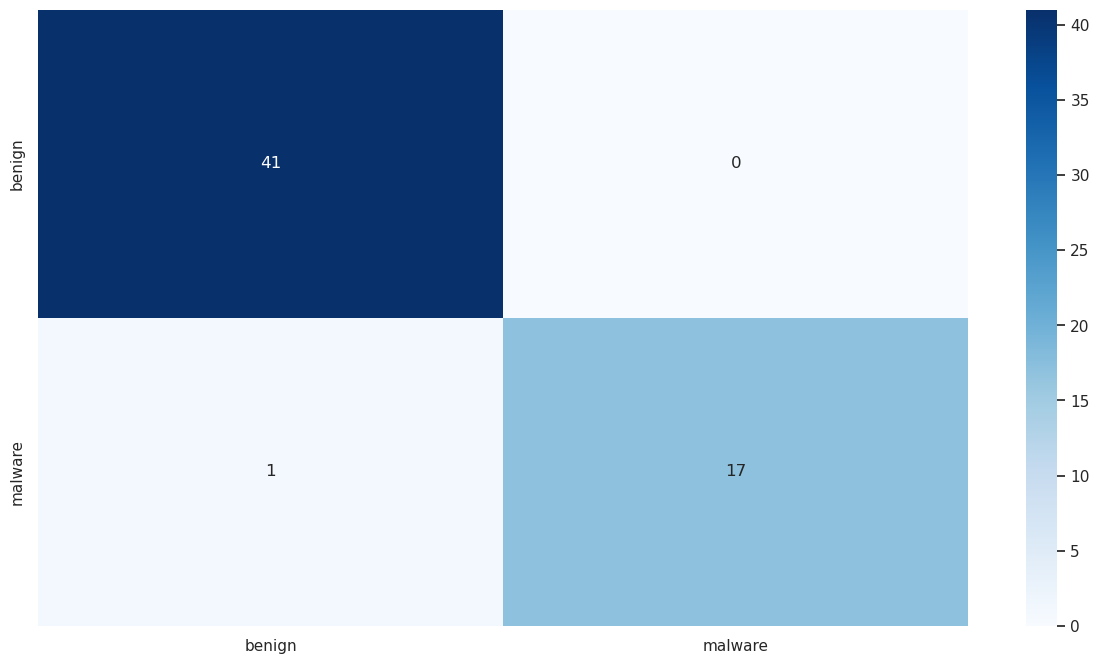

In [130]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
predictions = clf.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
clf_report = classification_report(true_labels, predictions, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
print(clf_report)

## plot feature importance

Feature: 0, Score: 0.00400
Feature: 1, Score: 0.10621
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.04334
Feature: 4, Score: 0.00193
Feature: 5, Score: 0.28583
Feature: 6, Score: 0.00202
Feature: 7, Score: 0.06559
Feature: 8, Score: 0.00201
Feature: 9, Score: 0.00185
Feature: 10, Score: 0.01361
Feature: 11, Score: 0.10887
Feature: 12, Score: 0.14927
Feature: 13, Score: 0.08370
Feature: 14, Score: 0.13175


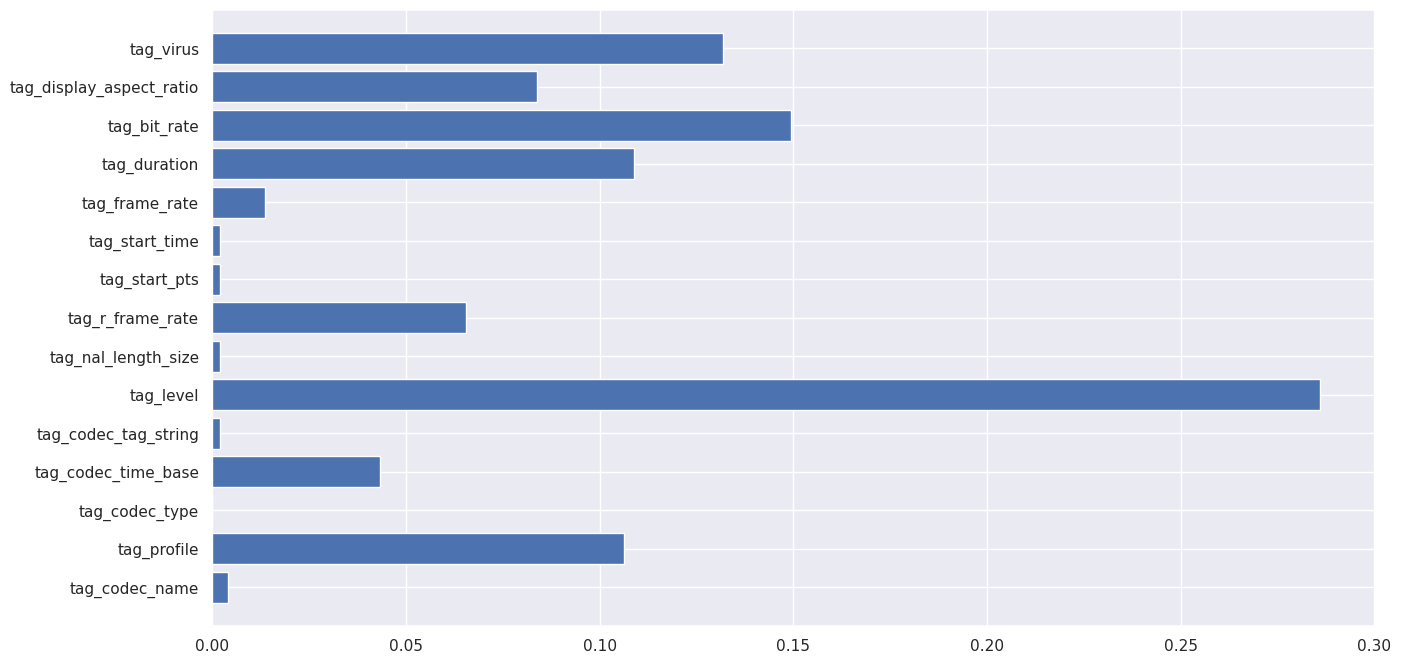

In [131]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.yticks(np.arange(X_train.shape[1]), features_list)
pyplot.ylim([-1, X_train.shape[1]])
pyplot.barh(range(X_train.shape[1]), clf.feature_importances_, align="center")
pyplot.show()

## GradientBoostingClassifier()

[('benign', 192), ('malware', 82)]
              precision    recall  f1-score   support

      benign    0.97619   1.00000   0.98795        41
     malware    1.00000   0.94444   0.97143        18

    accuracy                        0.98305        59
   macro avg    0.98810   0.97222   0.97969        59
weighted avg    0.98345   0.98305   0.98291        59



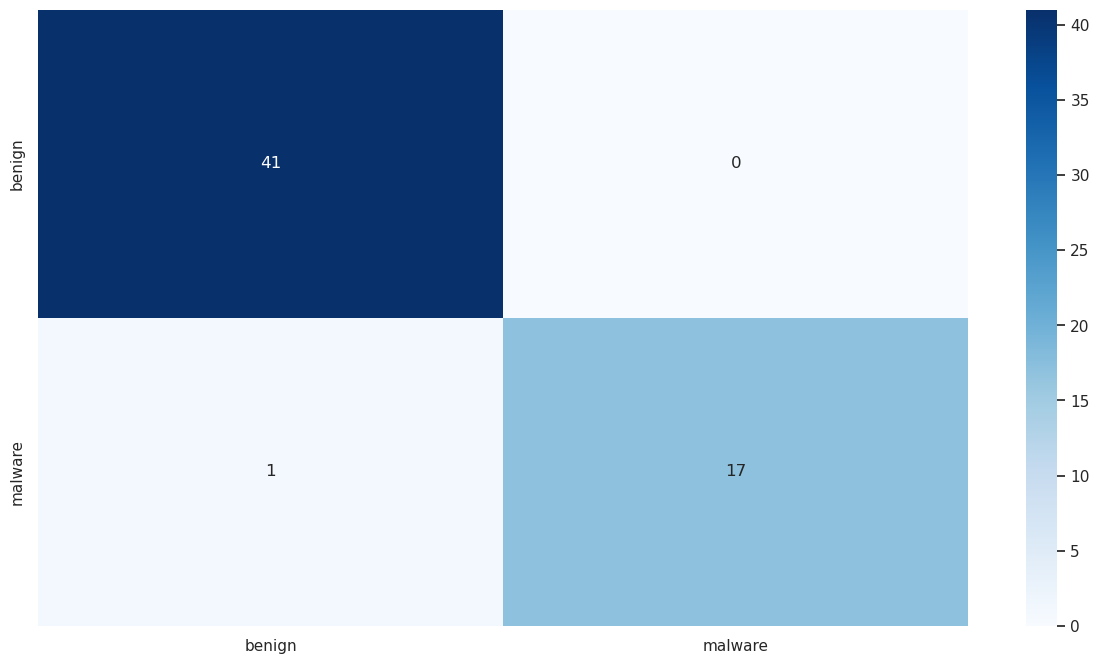

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_Boosting =  GradientBoostingClassifier(random_state=0)
# We choose our model of choice and set it's hyper parameters you can change anything
Gradient_Boosting.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))
ResultPrintout(Gradient_Boosting)

# plot feature importance

Feature: 0, Score: 0.00285
Feature: 1, Score: 0.28918
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00129
Feature: 4, Score: 0.00248
Feature: 5, Score: 0.46193
Feature: 6, Score: 0.00049
Feature: 7, Score: 0.00794
Feature: 8, Score: 0.00091
Feature: 9, Score: 0.00158
Feature: 10, Score: 0.00072
Feature: 11, Score: 0.02031
Feature: 12, Score: 0.05308
Feature: 13, Score: 0.01936
Feature: 14, Score: 0.13788


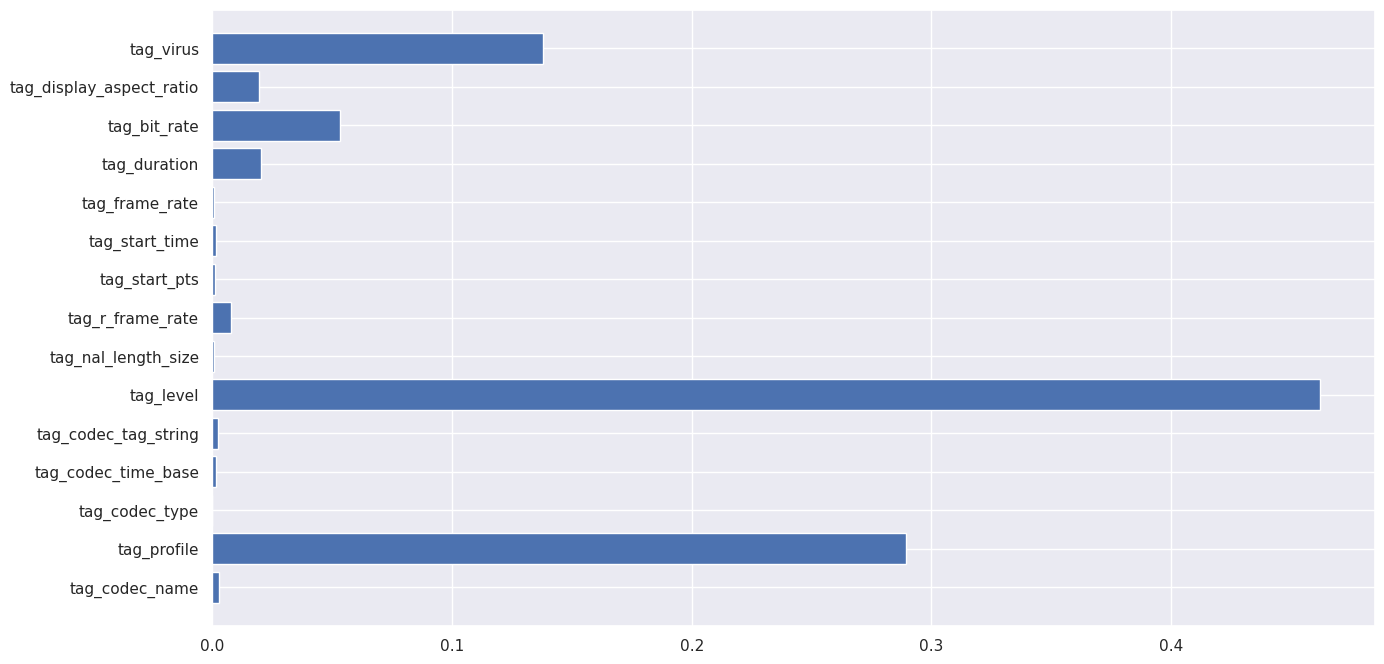

In [133]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from matplotlib import pyplot

# get importance
importance = Gradient_Boosting.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.yticks(np.arange(X_train.shape[1]), features_list)
pyplot.ylim([-1, X_train.shape[1]])
pyplot.barh(range(X_train.shape[1]), Gradient_Boosting.feature_importances_, align="center")
pyplot.show()

## ExtraTreesClassifier()

[('benign', 192), ('malware', 82)]
              precision    recall  f1-score   support

      benign    0.97619   1.00000   0.98795        41
     malware    1.00000   0.94444   0.97143        18

    accuracy                        0.98305        59
   macro avg    0.98810   0.97222   0.97969        59
weighted avg    0.98345   0.98305   0.98291        59



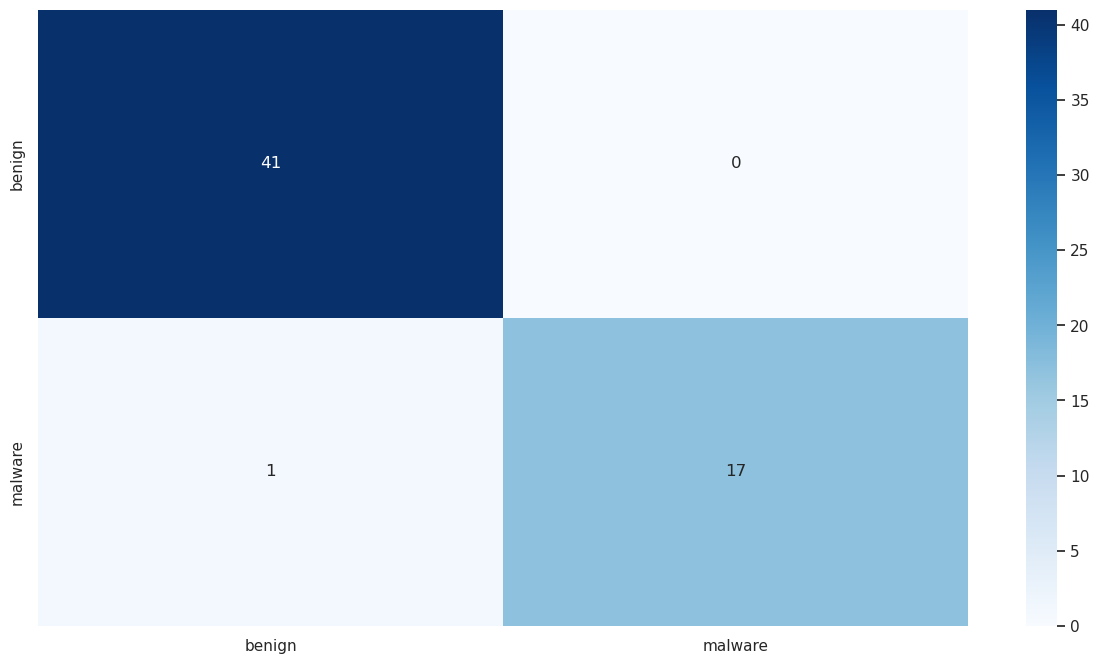

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
Extra_Trees=  ExtraTreesClassifier(random_state=42, class_weight='balanced')
# We choose our model of choice and set it's hyper parameters you can change anything
Extra_Trees.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))
ResultPrintout(Extra_Trees)

# plot feature importance

Feature: 0, Score: 0.00397
Feature: 1, Score: 0.09425
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.02953
Feature: 4, Score: 0.00285
Feature: 5, Score: 0.21415
Feature: 6, Score: 0.00634
Feature: 7, Score: 0.04361
Feature: 8, Score: 0.00164
Feature: 9, Score: 0.00362
Feature: 10, Score: 0.02648
Feature: 11, Score: 0.09741
Feature: 12, Score: 0.29363
Feature: 13, Score: 0.04885
Feature: 14, Score: 0.13369


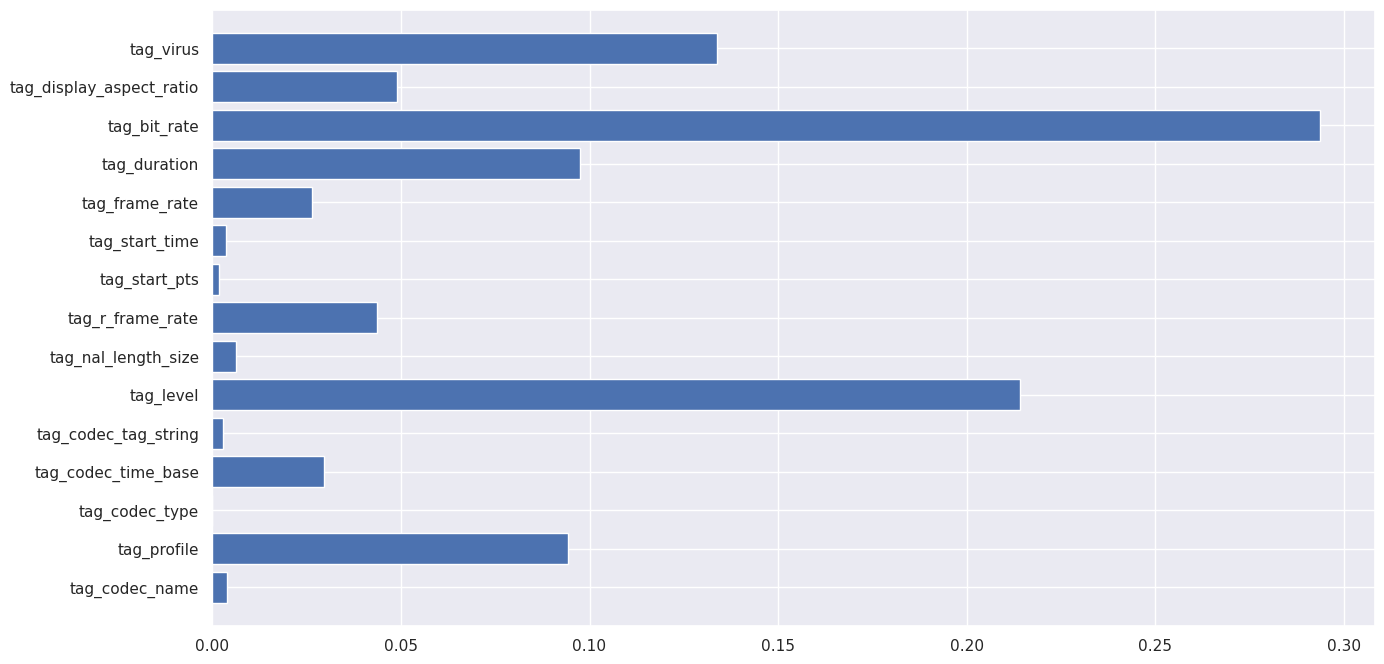

In [135]:
#from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get importance
importance = Extra_Trees.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.yticks(np.arange(X_train.shape[1]), features_list)
pyplot.ylim([-1, X_train.shape[1]])
pyplot.barh(range(X_train.shape[1]), Extra_Trees.feature_importances_, align="center")
pyplot.show()

# Testing more algorithms

AdaBoostClassifier(random_state=42)
              precision    recall  f1-score   support

      benign    0.97619   1.00000   0.98795        41
     malware    1.00000   0.94444   0.97143        18

    accuracy                        0.98305        59
   macro avg    0.98810   0.97222   0.97969        59
weighted avg    0.98345   0.98305   0.98291        59

SVC(class_weight='balanced', random_state=42)
              precision    recall  f1-score   support

      benign    0.95000   0.92683   0.93827        41
     malware    0.84211   0.88889   0.86486        18

    accuracy                        0.91525        59
   macro avg    0.89605   0.90786   0.90157        59
weighted avg    0.91708   0.91525   0.91588        59

DecisionTreeClassifier(class_weight='balanced', random_state=42)
              precision    recall  f1-score   support

      benign    0.93182   1.00000   0.96471        41
     malware    1.00000   0.83333   0.90909        18

    accuracy                       

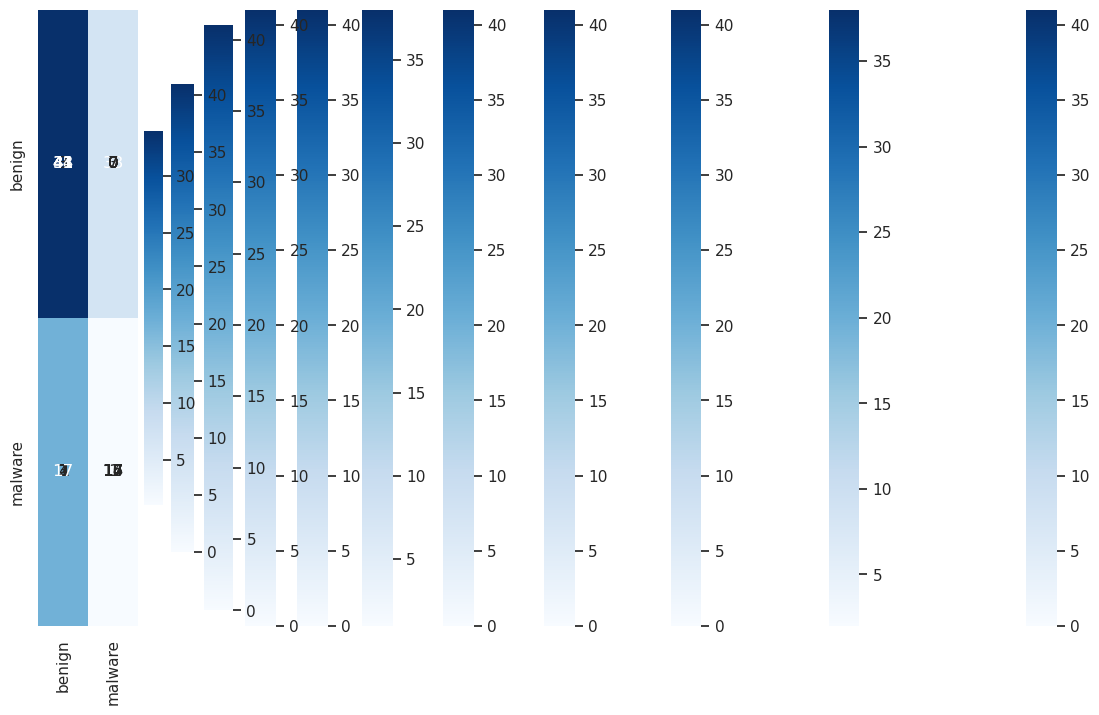

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import timeit
import xgboost 
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline


Logistic_Regression =  LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

Decision_Tree =DecisionTreeClassifier(random_state=42, class_weight='balanced')

Random_Forest =  RandomForestClassifier(random_state=42, class_weight='balanced')

Extra_Trees=  ExtraTreesClassifier(random_state=42, class_weight='balanced')

Gradient_Boosting =  GradientBoostingClassifier(random_state=42)

Hist_Gradient_Boosting =  HistGradientBoostingClassifier(random_state=42)

AdaBoost = AdaBoostClassifier(random_state=42)

SGD = SGDClassifier(random_state=42, class_weight='balanced')

SVC =SVC(class_weight='balanced', random_state=42)

Nearest_Neighbor = KNeighborsClassifier(100)

Perceptron = Perceptron(random_state=42)

models={Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost,SGD,SVC,Nearest_Neighbor,Perceptron}

for model in models:
    print(model)
    # Train Model
    model.fit(X_train, y_train)
    
    ResultPrintout(model)

## Choosing the best algorithm

In [137]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
best_accuracy=0
best_model=None
# ,gbc
models={clf,Gradient_Boosting,Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost,SGD,SVC,Nearest_Neighbor,Perceptron}

for i in models:
    print(i)
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = i.predict(X_test)
    true_labels = y_test
    print(accuracy_score(true_labels, predictions)*100)
    if accuracy_score(true_labels, predictions)*100 > best_accuracy:
        best_accuracy=accuracy_score(true_labels, predictions)*100
        best_model=i

        
print("------------------------------------------")
print(best_accuracy)
print(best_model)

RandomForestClassifier(n_estimators=150)
98.30508474576271
AdaBoostClassifier(random_state=42)
98.30508474576271
SVC(class_weight='balanced', random_state=42)
91.52542372881356
DecisionTreeClassifier(class_weight='balanced', random_state=42)
94.91525423728814
ExtraTreesClassifier(class_weight='balanced', random_state=42)
98.30508474576271
HistGradientBoostingClassifier(random_state=42)
98.30508474576271
SGDClassifier(class_weight='balanced', random_state=42)
33.89830508474576
RandomForestClassifier(class_weight='balanced', random_state=42)
98.30508474576271
Perceptron(random_state=42)
93.22033898305084
GradientBoostingClassifier(random_state=42)
98.30508474576271
LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
98.30508474576271
KNeighborsClassifier(n_neighbors=100)
59.32203389830508
------------------------------------------
98.30508474576271
RandomForestClassifier(n_estimators=150)


## Confusion matrix
In technical terms: A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to know the performance of the classification model on a set of test data for that the true values are known.

## Printing the best algorithm

[('benign', 192), ('malware', 82)]
              precision    recall  f1-score   support

      benign    0.97619   1.00000   0.98795        41
     malware    1.00000   0.94444   0.97143        18

    accuracy                        0.98305        59
   macro avg    0.98810   0.97222   0.97969        59
weighted avg    0.98345   0.98305   0.98291        59



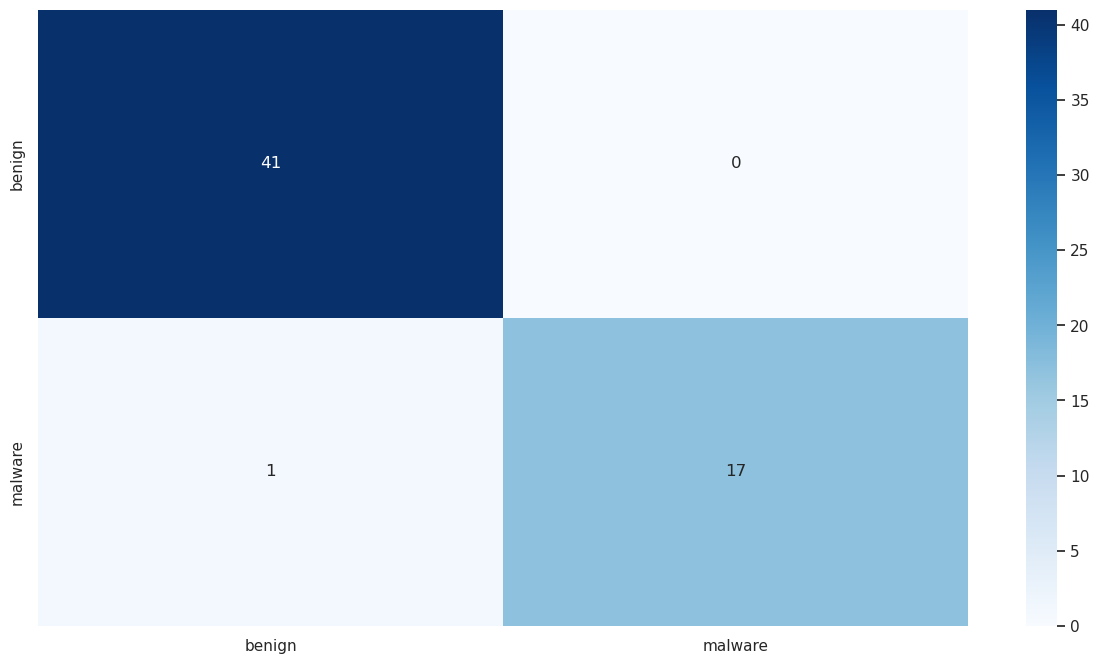

In [138]:
best_model.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))
ResultPrintout(best_model)

## Accuracy:
    
Accuracy tells us how often is the classifier correct?

Accuracy = ( TP + TN ) / ( TP + TN + FP + FN )
True Positive (TP) : Observation is positive, and is predicted to be positive.

False Negative (FN) : Observation is positive, but is predicted negative.

True Negative (TN) : Observation is negative, and is predicted to be negative.

False Positive (FP) : Observation is negative, but is predicted positive.

i used sklearn - Accuracy which calculates this
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html https://medium.com/analytics-vidhya/classification-and-its-performance-metrics-in-machine-learning-f0ad57866ec9

## Recall

Recall gives us an idea about when it’s actually yes, how often does it predict yes. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

i used sklearn - recall


In [139]:
predictions = best_model.predict(X_test)
true_labels = y_test
accuracy = accuracy_score(true_labels, predictions)
#The printing is according to the section Introduction to ML in python given to us
print("Accuracy score: {0:.2f}%".format(accuracy*100))
print(best_model)

Accuracy score: 98.31%
RandomForestClassifier(n_estimators=150)


In [140]:
from sklearn.metrics import recall_score
recall_average = recall_score(y_test, best_model.predict(X_test), average="binary", pos_label= 'malware')
print("Recall score: {0:.2f}%".format(recall_average*100))

Recall score: 94.44%


#### save the model 

In [141]:
# save the model 
import pickle
pickle.dump(best_model, open("model.pkl",'wb'))

In [142]:
tmp.to_csv("../Downloads/out.csv") 

#### Creating DataFrame to Export Pandas DataFrame to CSV

https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/

In [143]:
# dictionary of list
dict = {'index': range(0,333), 'video_nal': tmp["mal"]}
df = pd.DataFrame(dict)
print(df)
df.to_csv('results.csv',index=False)

     index video_nal
0        0    benign
1        1    benign
2        2    benign
3        3    benign
4        4    benign
..     ...       ...
328    328    benign
329    329   malware
330    330    benign
331    331    benign
332    332    benign

[333 rows x 2 columns]
